In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timestamp
from tqdm import tqdm
import math


# Reading the data

In [2]:
data_df = pd.read_csv('crspm_and_predictors.csv')
data_df

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,MomSeason06YrPlus,MomOffSeason06YrPlus,grcapx,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf
0,10659,199102,-0.17188,-15.3846,1.760959,-8.844859,15.3846,0.000000,0.407414,-0.035295,...,NaN,NaN,0.799007,NaN,NaN,0.795044,-0.379424,-0.109776,NaN,-0.371791
1,10659,199103,-0.10938,-36.3636,2.212927,-8.392890,36.3636,0.000000,0.259268,-0.065733,...,NaN,NaN,0.799007,NaN,NaN,0.795044,-0.483346,-0.109776,NaN,-0.371791
2,10659,199104,-0.21875,100.0000,1.519826,-9.085992,-100.0000,-0.571429,0.518512,-0.127870,...,NaN,NaN,0.802281,NaN,-0.043613,0.439730,-0.470160,-0.050594,NaN,-0.138481
3,10659,199105,-0.21875,0.0000,1.519826,-9.085992,0.0000,-0.142857,0.518512,-0.045962,...,NaN,NaN,0.802281,NaN,-0.046697,0.439730,-0.498256,-0.050594,NaN,-0.138481
4,10659,199106,-0.20313,-7.1429,1.593909,-9.011908,7.1429,0.000000,0.481488,-0.015972,...,NaN,NaN,0.802281,NaN,-0.050251,0.439730,-0.116901,-0.050594,NaN,-0.138481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994023,10232,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994024,10274,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994025,10301,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994026,10326,198605,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
rf_rates = pd.read_csv('TB3MS.csv')
rf_rates

,observation_date,TB3MS
0,1934-01-01,0.72
1,1934-02-01,0.62
2,1934-03-01,0.24
3,1934-04-01,0.15
4,1934-05-01,0.16
...,...,...
1089,2024-10-01,4.51
1090,2024-11-01,4.42
1091,2024-12-01,4.27
1092,2025-01-01,4.21


In [4]:
rf_rates['observation_date'] = pd.to_datetime(rf_rates['observation_date'], format='%Y-%m-%d')
data_df['yyyymm'] = pd.to_datetime(data_df['yyyymm'], format='%Y%m') #df.loc[:, 'yyyymm']

In [5]:
# df_init = pd.merge(data_df, rf_rates, left_on='yyyymm',
#                         right_on='observation_date', how='left')

# df_init.drop(columns=['observation_date'], inplace=True)
# df_init.rename(columns={'TB3MS': 'RiskFree', 'yyyymm': 'date'}, inplace=True)
# df_init['ExcessReturn'] = df_init['ret'] - df_init['RiskFree']
# df_init.reset_index(drop=True, inplace=True)

# not_pred = ['permno', 'date', 'prc', 'ret', 'Price', 'RiskFree', 'ExcessReturn']
# pred = [c for c in df_init.columns if c not in not_pred]

# x = df_init.drop(columns=not_pred).copy()
# y = df_init['ExcessReturn'].copy()
# correlations = x.corrwith(y)
# correlations.sort_values(ascending=False, inplace=True)

# correlations


## Exploratory Data Analysis
### Missing Values and Summary Stats
### Distribution Plots of Key Precitors
### Correlation HeatMap plot 
### Outlier Analysis and BoxPlots

## 1. Missing Values & Summary Stats Plot Code


BetaTailRisk            2974537
MomOffSeason06YrPlus    2850545
MomSeason06YrPlus       2843051
ShareIss5Y              2776261
CBOperProf              2744488
EarningsSurprise        2713356
EarnSupBig              2690731
Investment              2671574
PctTotAcc               2667131
EntMult                 2652319
grcapx                  2639955
IndRetBig               2639494
ChAssetTurnover         2580384
roaq                    2550904
GrSaleToGrInv           2546504
HerfAsset               2523903
HerfBE                  2523903
VarCF                   2523149
AbnormalAccruals        2492152
CredRatDG               2485667
dtype: int64


/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_54618/2826001027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")


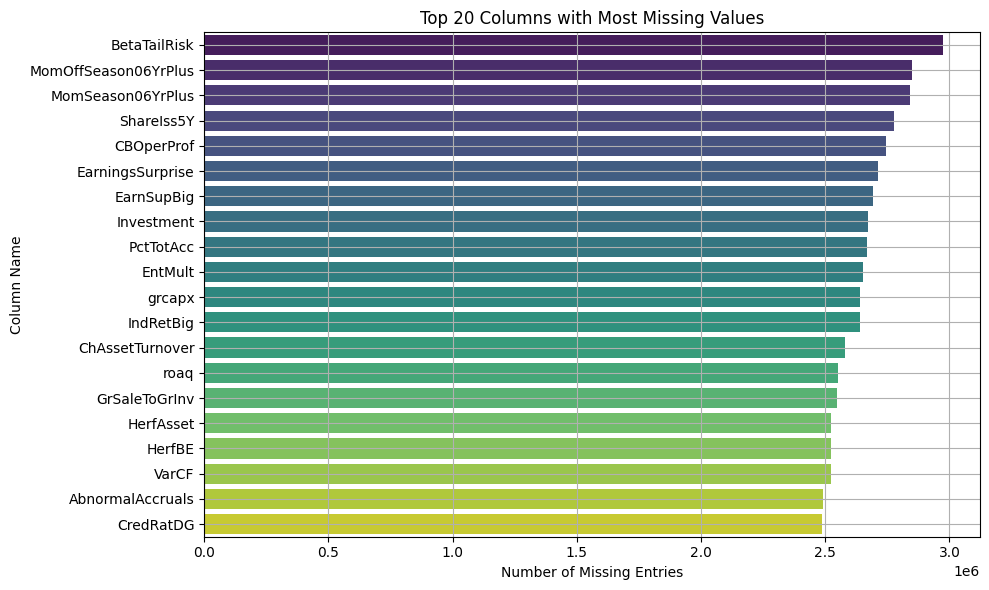

In [6]:

# --- Missing Values Bar Plot (Top 20 Columns) ---
missing_values = data_df.isnull().sum().sort_values(ascending=False).head(20)
print(missing_values)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.title('Top 20 Columns with Most Missing Values')
plt.xlabel('Number of Missing Entries')
plt.ylabel('Column Name')
plt.grid(True)
plt.tight_layout()
plt.show()
 


## Top 20 Columns with Most Missing Values

This bar chart displays the top 20 predictors with the highest number of missing entries.

---

### Key Observations:

- **`BetaTailRisk`**, **`MomOffSeason06YrPlus`**, and **`MomSeason06YrPlus`** have the most missing values (close to 3 million).
- Other predictors with substantial missingness include:
  - `CBOperProf`, `EarningsSurprise`, `EarnSupBig`, `PctTotAcc`
  - Intangible-related variables like `HerfAsset`, `HerfBE`, and `VarCF`
- These features may require:
  - Imputation (mean/median, regression, or advanced techniques)
  - Removal (if too sparse or low relevance)
  - Careful consideration in model training

---

### Next Steps:
- Consider **domain knowledge** when deciding whether to retain/impute.
- Use this insight to guide **feature selection and cleaning strategy**.

---


## 2. Time Series Plots/Trends
- Number of Firms overtime
- Average Monthly return over time


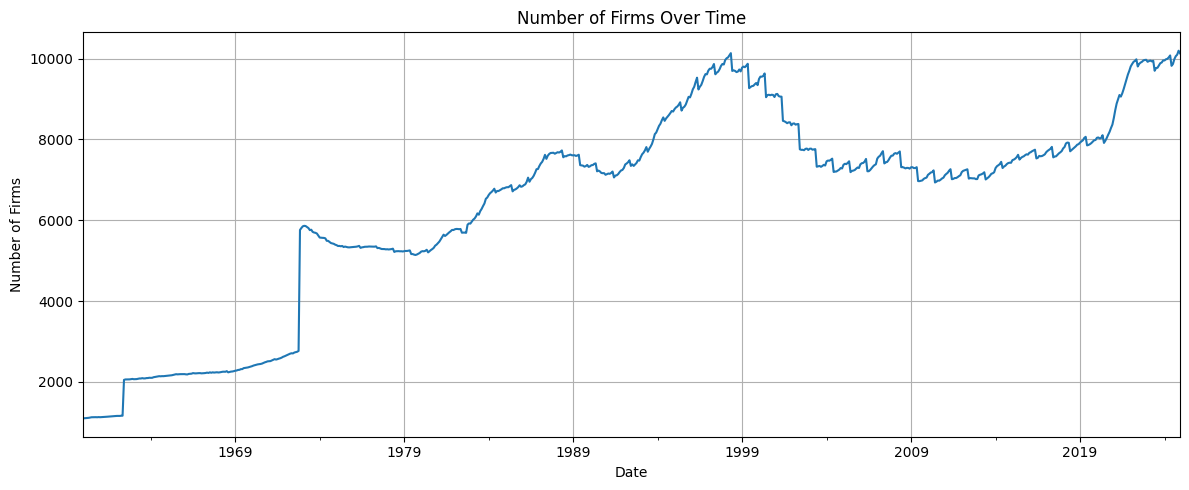

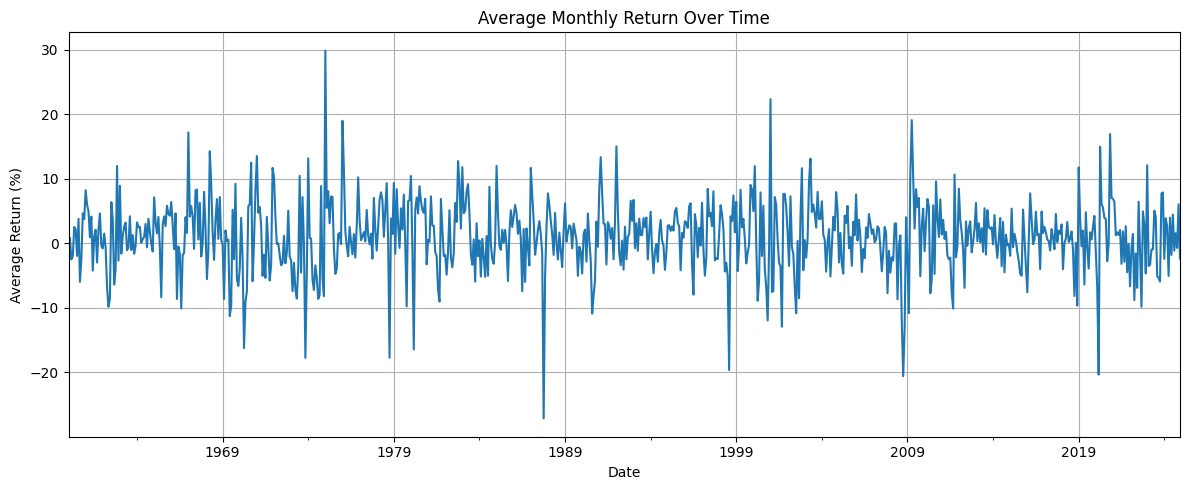

In [7]:
# Monthly firm counts and average return
monthly_firm_counts = data_df.groupby('yyyymm')['permno'].nunique()
monthly_avg_return = data_df.groupby('yyyymm')['ret'].mean()

# Plot firm count over time
plt.figure(figsize=(12, 5))
monthly_firm_counts.plot()
plt.title("Number of Firms Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Firms")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot average return over time
plt.figure(figsize=(12, 5))
monthly_avg_return.plot()
plt.title("Average Monthly Return Over Time")
plt.xlabel("Date")
plt.ylabel("Average Return (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Time-Series Summary

### Number of Firms Over Time
- Steady growth from 1960s to late 1990s, followed by a decline.
- Recent years show recovery to over 10,000 firms.

### Average Monthly Return Over Time
- Returns fluctuate heavily, with visible spikes and drops.
- No clear long-term trend, but periods of high volatility are evident.

---


## 3. Distribution Plots of key Predictors
- Size
- BM
- Mom12m
- ret

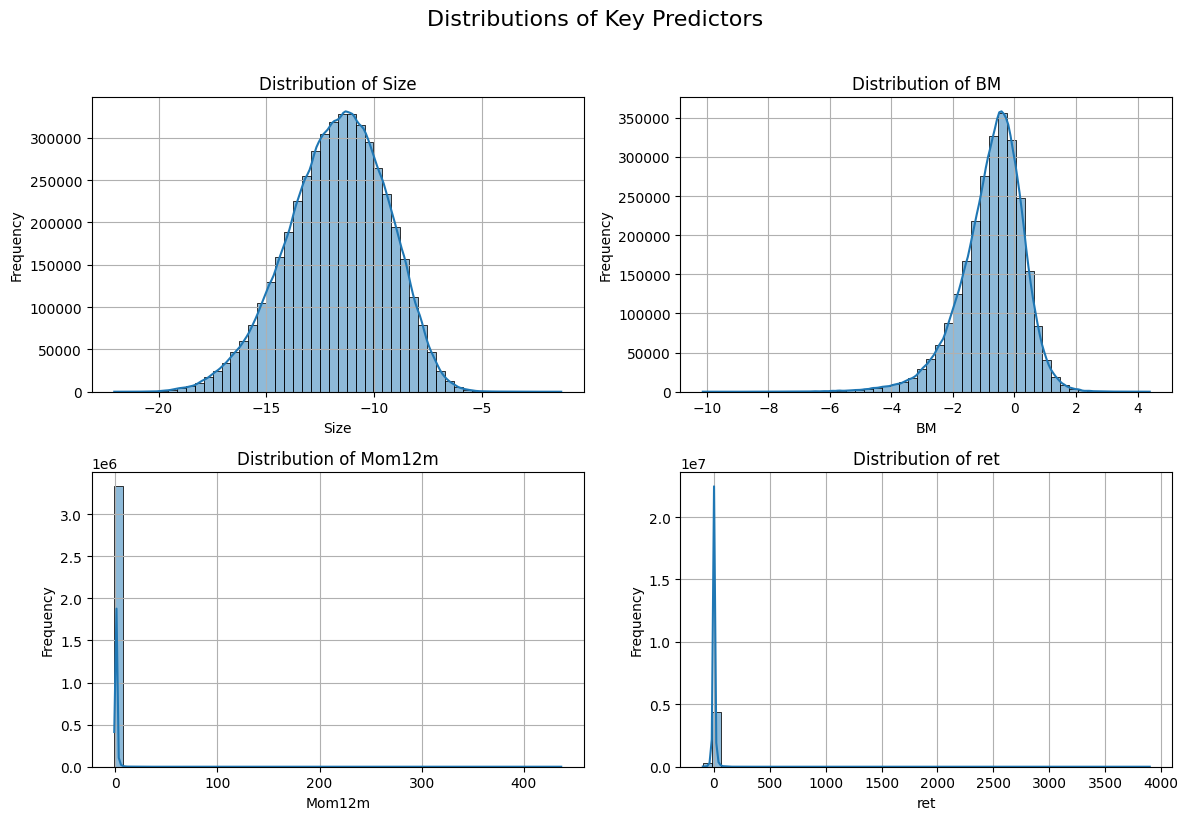

In [8]:

# Define key predictors
key_predictors = ['Size', 'BM', 'Mom12m', 'ret']
available_predictors = [var for var in key_predictors if var in data_df.columns]

# Set up subplot grid: 2 plots per row
n = len(available_predictors)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Generate histograms
for i, var in enumerate(available_predictors):
    sns.histplot(data_df[var].dropna(), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distributions of Key Predictors", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Distributions of Key Predictors

This section summarizes the distributional characteristics of four key financial predictors based on histogram plots.

---

### **1. Size**
- Roughly **normally distributed** and symmetric.
- Likely already **log-transformed**.
- No extreme outliers visible.

---

### **2. BM (Book-to-Market)**
- Slight **right skew** with a long positive tail.
- Distribution centered around 0.
- Generally well-behaved.

---

### **3. Mom12m (12-month Momentum)**
- **Highly right-skewed** with extreme values.
- Most observations are concentrated near 0.
- Strong candidate for **winsorization** or **log transformation**.

---

### **4. ret (Returns)**
- Also shows a **sharp right skew**.
- Heavy concentration near 0 with extreme outliers (some > 3000).
- Consider **transformation** or **outlier filtering** before modeling.


## 4. Correlation Heatmap

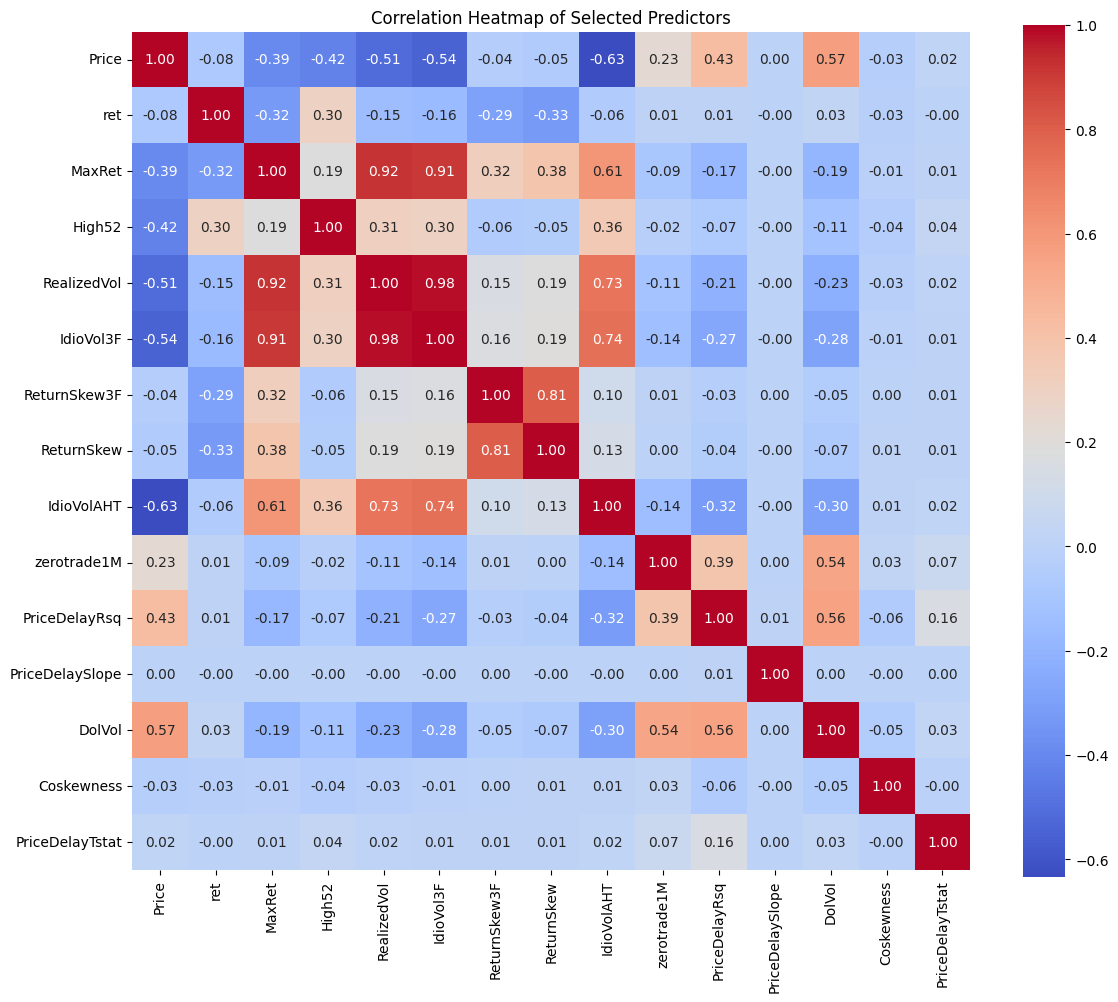

In [9]:
# Correlation heatmap for top predictors
non_null_counts = data_df.isnull().sum().sort_values()
top_predictors = non_null_counts[non_null_counts < len(data_df) * 0.2].index.tolist()[5:20]
corr_data = data_df[top_predictors].dropna().corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Selected Predictors")
plt.tight_layout()
plt.show()

## Correlation Heatmap Interpretation: Selected Financial Predictors

This heatmap visualizes the **pairwise Pearson correlation coefficients** between selected predictors. The colors represent strength and direction of the correlation:

- **Red**: Strong positive correlation
- **Blue**: Strong negative correlation
- **White**: Weak or no correlation

---

### Strong Positive Correlations

- **`RealizedVol`, `IdioVol3F`, `IdioVolAHT`, `MaxRet`**
  - All have very high mutual correlations (**> 0.9**)
  - These are volatility-related and likely redundant
- **`ReturnSkew` & `ReturnSkew3F`** = **0.81**
  - Near-duplicate skewness measures

---

### Redundant Variable Pairs (Corr ≥ 0.9)

| Variable Pair                    | Correlation | Suggestion            |
|----------------------------------|-------------|------------------------|
| `IdioVol3F` & `RealizedVol`      | 0.98        | Keep one              |
| `IdioVol3F` & `MaxRet`           | 0.92        | Likely redundant       |
| `ReturnSkew` & `ReturnSkew3F`    | 0.81        | Choose one             |
| `IdioVol3F` & `IdioVolAHT`       | 0.74        | Possibly redundant     |

These pairs measure similar risk/return asymmetries. Keep **only one** from each group in your model to avoid multicollinearity.

---

### Strong Negative Correlations

- **`Price` vs `IdioVolAHT`** = **-0.63**
- **`Price` vs `RealizedVol`, `IdioVol3F`** = around **-0.5**

Higher-priced stocks tend to have **lower idiosyncratic risk** and volatility.

---

### Low/Neutral Correlations

- **`ret`** shows weak correlation with all variables (mostly between -0.3 and 0.3)
  - Reflects the **difficulty in predicting returns linearly**
- **`Coskewness`** has very low correlations across the board
  - Could be an **informative independent signal**

---

### Recommendations

- Use **PCA or VIF analysis** to formally assess multicollinearity
- For modeling, retain:
  - **One volatility metric**: `IdioVol3F` OR `RealizedVol`
  - **One skewness metric**: `ReturnSkew` OR `ReturnSkew3F`
- Consider keeping:
  - `Coskewness` and `PriceDelayTstat` — low correlation = unique signal

---

### Summary

| Variable         | High Correlation With | Keep or Drop |
|------------------|------------------------|---------------|
| `RealizedVol`    | `IdioVol3F`, `MaxRet`  | Drop          |
| `ReturnSkew3F`   | `ReturnSkew`           | Drop          |
| `Coskewness`     | None                   | Keep          |
| `ret`            | Weakly correlated      | Target only   |


## 5. Outlier Analysis
- find top outliers using zscores approach
- we run boxplots on some outliers identified from the first step


In [10]:

from scipy.stats import zscore

# Get summary stats of numeric columns
cleaned_data_df = data_df.replace({-np.inf: np.nan, np.inf: np.nan}).fillna(0)
summary = cleaned_data_df.select_dtypes(include=[np.number]).describe().T

# Calculate extra fields for outlier detection
summary["range"] = summary["max"] - summary["min"]
summary["mean_median_diff"] = np.abs(summary["mean"] - summary["50%"])
summary["std_relative"] = summary["std"] / (summary["mean"].replace(0, np.nan).abs())  # Avoid divide by 0

# Heuristics: large range, large mean-median difference, or very high std relative to mean
outlier_flags = (summary["range"] > 1000) | \
                (summary["mean_median_diff"] > summary["std"]) | \
                (summary["std_relative"] > 10)

# Filter for columns with potential issues
potential_outlier_vars = summary[outlier_flags].sort_values(by="range", ascending=False)

# Display
# Step 1: Select numeric columns
numeric_df = cleaned_data_df.select_dtypes(include=[np.number])

# Step 2: Drop rows with missing values for clean z-score calculation
zscore_df = numeric_df.dropna()

# Step 3: Calculate z-scores
zscores = zscore(zscore_df)

# Step 4: Create a mask for outliers (z-score > 3)
outlier_mask = np.abs(zscores) > 3

# Step 5: Count outliers per column
outlier_counts = outlier_mask.sum(axis=0)

# Step 6: Create summary DataFrame
outlier_summary = pd.DataFrame({
    'Variable': zscore_df.columns,
    'OutlierCount': outlier_counts,
    'TotalCount': len(zscore_df),
    'OutlierPercent': (outlier_counts / len(zscore_df)) * 100
}).sort_values(by='OutlierCount', ascending=False).reset_index(drop=True)

# Display the summary
print(outlier_summary.head(20))  # Top 20 variables with most outliers


              Variable  OutlierCount  TotalCount  OutlierPercent
0             ConvDebt        467269     4994028        9.356555
1               IndIPO        378308     4994028        7.575208
2          zerotrade1M        177837     4994028        3.560993
3          zerotrade6M        171268     4994028        3.429456
4         zerotrade12M        168314     4994028        3.370305
5            HerfAsset        157760     4994028        3.158973
6      NumEarnIncrease        152267     4994028        3.048982
7     NetEquityFinance        128017     4994028        2.563402
8       NetDebtFinance        122579     4994028        2.454512
9                 hire        118493     4994028        2.372694
10             FirmAge        111712     4994028        2.236912
11          ReturnSkew        110071     4994028        2.204053
12              DelCOA        109856     4994028        2.199747
13               ChInv        107103     4994028        2.144622
14           IndRetBig   

## Box Plots for Outlier Analysis


chunk is ['ret', 'EarnSupBig']


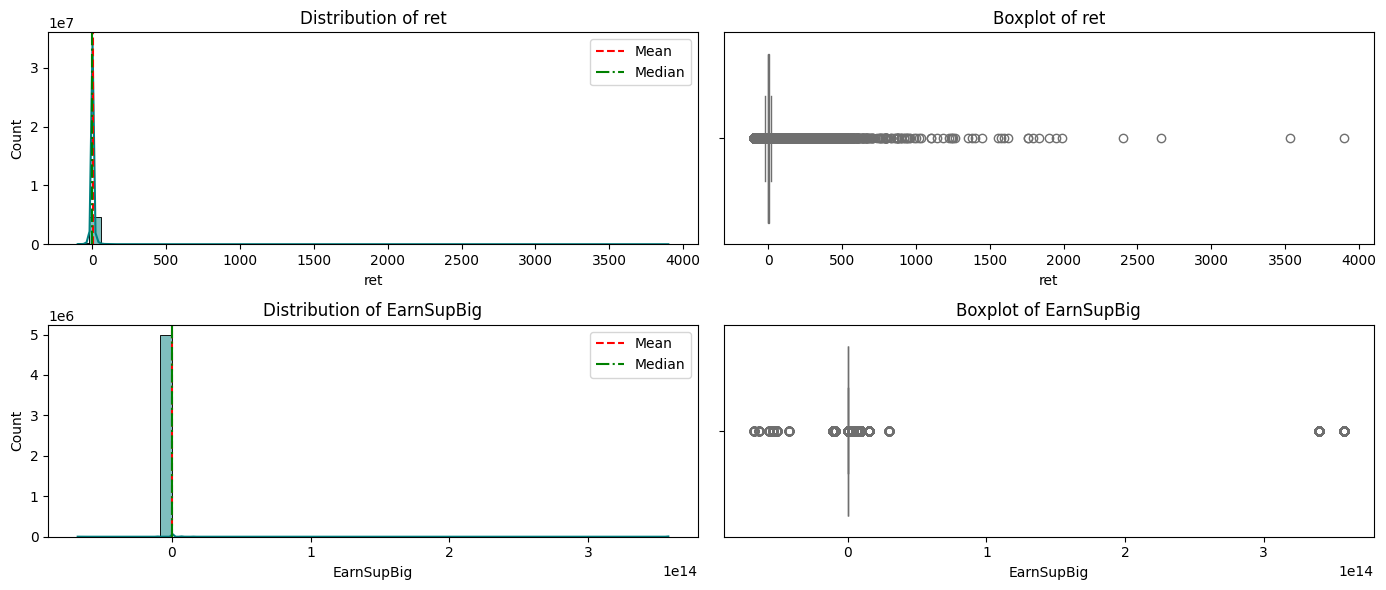

chunk is ['EarningsSurprise', 'Price']


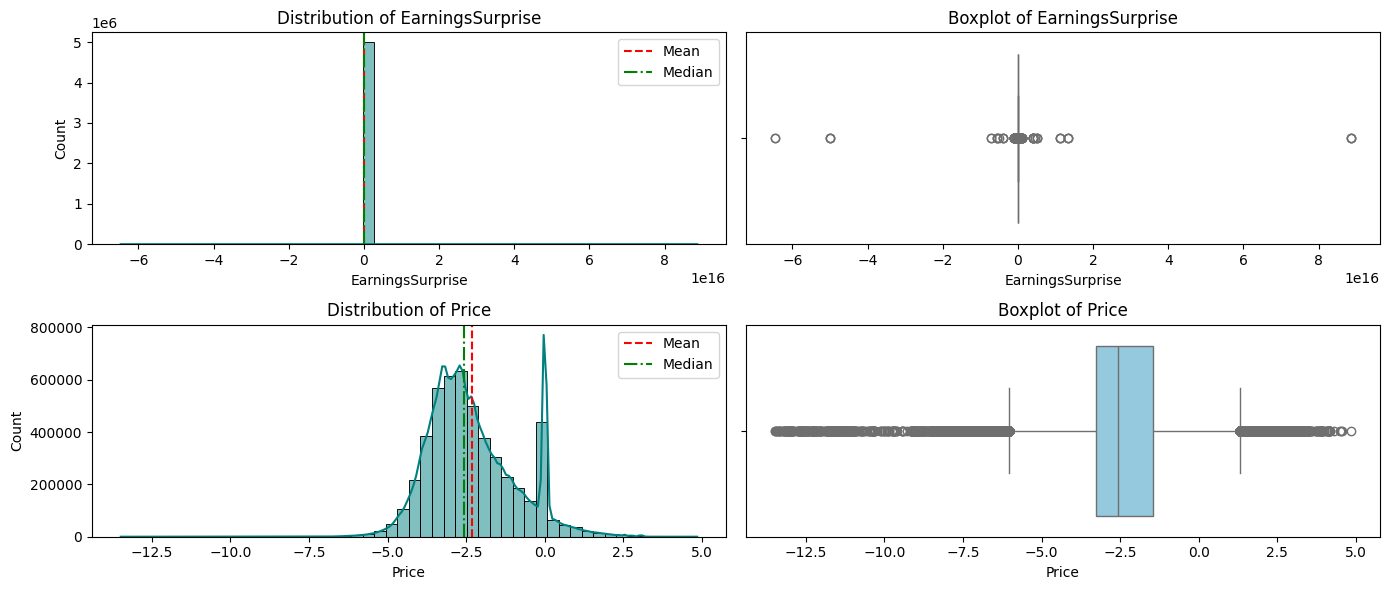

chunk is ['PctTotAcc', 'CBOperProf']


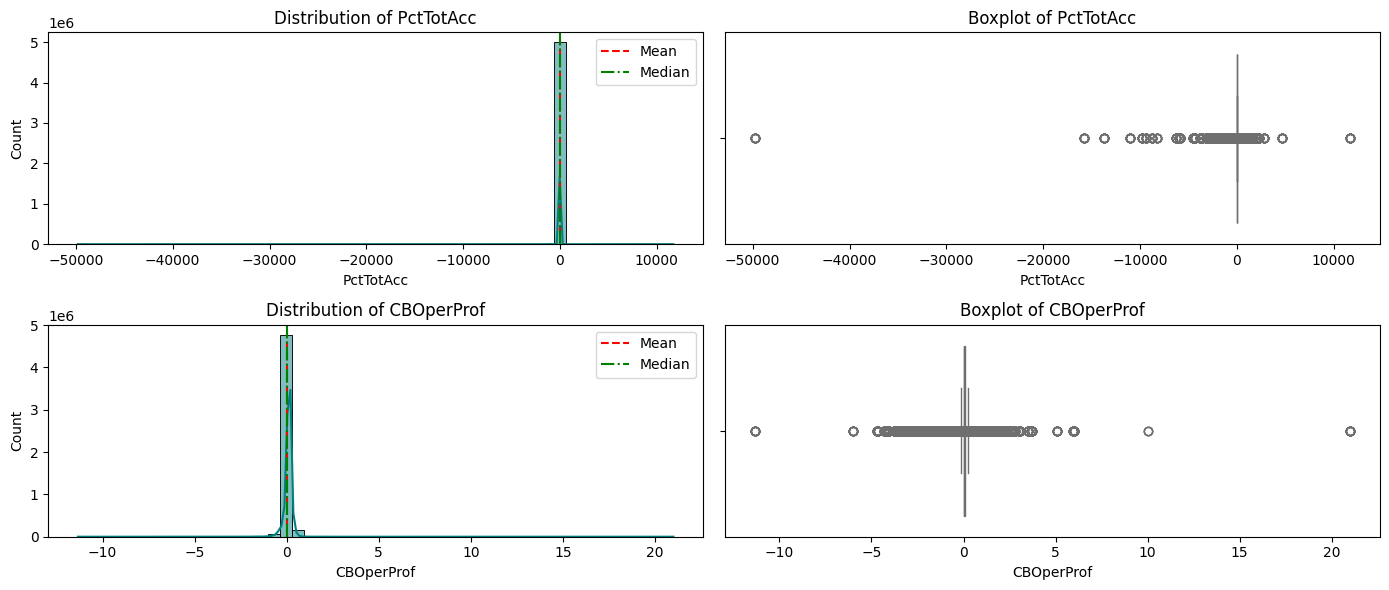

In [11]:
# List of key variables with suspected outliers
OUTLIER_COLS = ['ret', 'EarnSupBig', 'EarningsSurprise', 'Price', 'PctTotAcc', 'CBOperProf']

def chunked(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
[i for i in chunked(OUTLIER_COLS, 4)]


outliers_data = cleaned_data_df[OUTLIER_COLS].replace([np.inf, -np.inf], np.nan).dropna()
# Helper: split list into chunks of 4
def chunked(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

for chunk in chunked(OUTLIER_COLS, 2):
    print(f'chunk is {chunk}' )
    fig, axes = plt.subplots(nrows=len(chunk), ncols=2, 
                         figsize=(14, 3*len(chunk)))

    for i, col in enumerate(chunk):
        
        # Histogram with KDE
        #sns.histplot(clean_data[col], kde=True, ax=axes[i,0], color='teal')
        sns.histplot(outliers_data[col].dropna(), bins=50, kde=True, ax=axes[i, 0], color='teal')
        axes[i,0].axvline(outliers_data[col].mean(), color='red', linestyle='--', label='Mean')
        axes[i,0].axvline(outliers_data[col].median(), color='green', linestyle='-.', label='Median')
        axes[i,0].set_title(f'Distribution of {col}', fontsize=12)
        axes[i,0].legend()
        
        # Boxplot
        sns.boxplot(x=outliers_data[col], ax=axes[i,1], color='skyblue')
        axes[i,1].set_title(f'Boxplot of {col}', fontsize=12)
        
    plt.tight_layout()
    plt.show()

## Variable Distribution & Outlier Summary

Below is the interpretation of histogram + boxplot visualizations for selected financial predictors.

---

### **1. `ret` (Return)**
- **Skew**: Strong right-skewed
- **Outliers**: Extremely high returns (> 3000)
- **Insights**:
  - Most returns cluster near 0
  - Outliers heavily distort the distribution
- **Action**: Consider log-transform, winsorization, or trimming extreme values

---

### **2. `EarnSupBig` (Earnings Surprise - Big)**
- **Skew**: Highly right-skewed
- **Outliers**: Very large (up to ~1e14), both positive and negative
- **Insights**:
  - Extreme concentration at 0
  - May contain data quality issues
- **Action**: Log-transform (if strictly positive), clip/winsorize, or investigate abnormal values

---

### **3. `EarningsSurprise`**
- **Skew**: Extremely right-skewed
- **Outliers**: Huge magnitude (±1e16)
- **Insights**:
  - Likely overwhelming influence on models
  - Potential errors or unit mismatches
- **Action**: Investigate, then scale, transform, or clean

---

### **4. `Price`**
- **Skew**: Mild left-skew
- **Outliers**: Present but moderate
- **Insights**:
  - Distribution centered around -2
  - Shape resembles a log-normal or transformed scale
- **Action**: Log-scale check, winsorization optional, standardize for modeling

---

### **5. `PctTotAcc` (Percent Total Accruals)**
- **Skew**: Heavy left-skew
- **Outliers**: Extreme (from -50,000 to +10,000)
- **Insights**:
  - Most values near 0
  - Outliers dominate visualization and statistics
- **Action**: Winsorization strongly recommended

---

### **6. `CBOperProf` (Cash-Based Operating Profitability)**
- **Skew**: Mild skew
- **Outliers**: Present but not excessive
- **Insights**:
  - Tight distribution with few outlying values
- **Action**: Consider robust scaling (e.g. `RobustScaler`) or light winsorization

---

### Summary Table

| Variable         | Skewed? | Outliers? | Recommended Action                      |
|------------------|---------|-----------|------------------------------------------|
| `ret`            | Yes     | Extreme   | Winsorize or log-transform               |
| `EarnSupBig`     | Yes     | Extreme   | Investigate, clip, transform             |
| `EarningsSurprise` | Yes   | Very high | Clean or scale after inspection          |
| `Price`          | Slight  | Moderate  | Log-scale or winsorize if needed         |
| `PctTotAcc`      | Yes     | Severe    | Strong winsorization                     |
| `CBOperProf`     | Mild    | Moderate  | Robust scaling or light winsorization    |


## Principal Component Analysis (PCA) Analysis on the entire dataset 


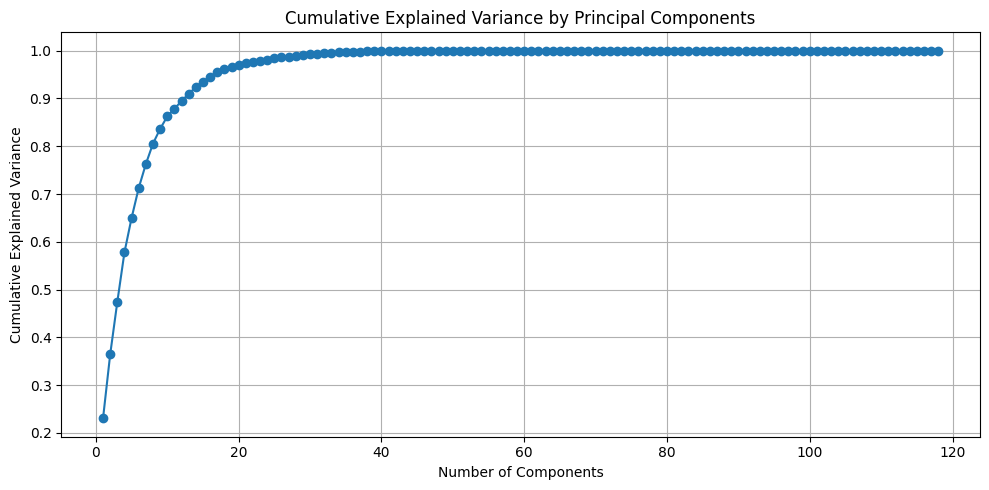

In [12]:


# Step 1: Select numeric predictor variables only (exclude identifiers, returns, etc.)
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


predictor_df = cleaned_data_df.select_dtypes(include='number').fillna(0)

# Step 2: Drop columns with excessive missing values (>30%) and fill remaining
threshold = 0.3
missing_fraction = predictor_df.isnull().mean()
predictors_cleaned = predictor_df.loc[:, missing_fraction < threshold]
predictors_cleaned = predictors_cleaned.fillna(predictors_cleaned.mean())

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(predictors_cleaned)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()




## PCA Plot Interpretation

This plot is a classic **PCA  plot** showing the **cumulative explained variance** vs. the **number of principal components**. 

---

### What the Plot Shows:

- **X-axis**: Number of principal components (PCs) — each one is a linear combination of original features.
- **Y-axis**: **Cumulative explained variance** — how much of the total variance in the data is explained as you add more components.

---

### Key Observations:

1. **Steep Rise in the First Few Components:**
   - The first ~10–15 components explain a **large portion** of the total variance (over 90%).
   - This suggests a lot of **redundancy or correlation** in your original features — PCA is effectively compressing the information.

2. **Plateau Around 20 Components:**
   - After about 20 components, the curve **flattens** — meaning additional components add **very little** new information.
   - Beyond this point, you're mostly capturing noise or very minor variation.

3. **~98% of Variance Explained by ~25–30 Components:**
   - From visual inspection, around 25–30 PCs explain nearly **100% of the variance**.
   - You started with ~119 features, so you can **reduce dimensionality by ~75%** with minimal information loss.

---

### Implications:

- PCA can significantly reduce the number of variables you use without losing much explanatory power.
- You might choose the **first 15–30 components** depending on your threshold (e.g., 95% or 99% variance).
- Useful for:
  - **Visualization**
  - **Reducing multicollinearity**
  - **Faster modeling with less noise**


## Feature Scaling Comparision MinMaxScaler vs StandardScaler

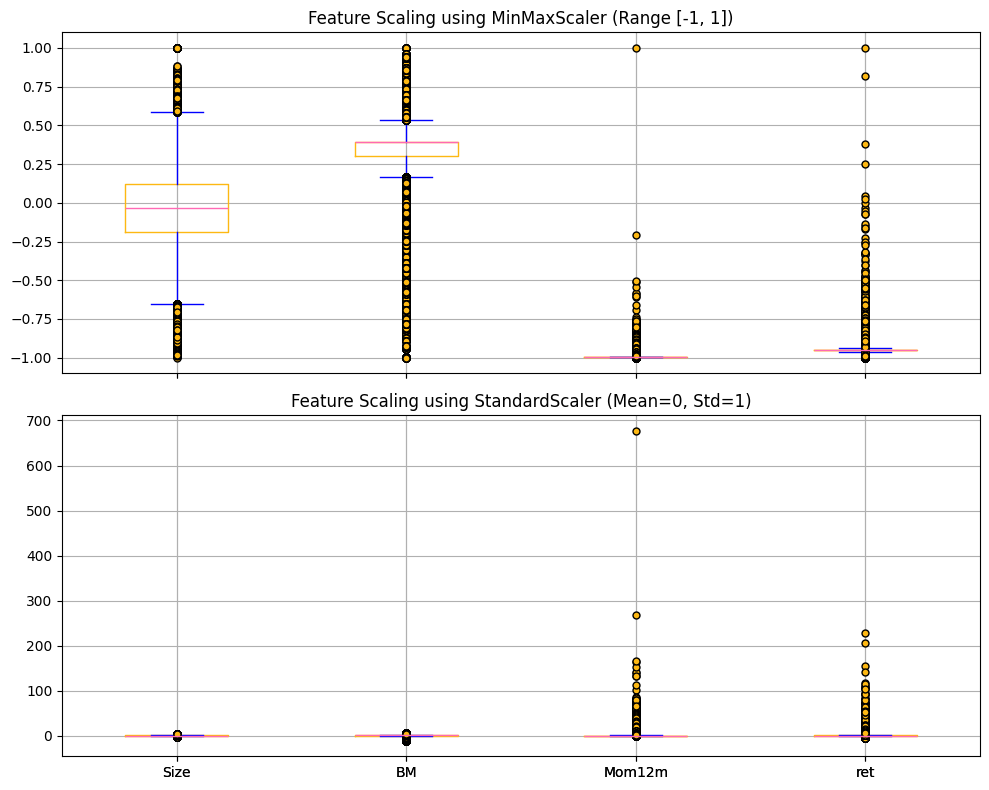

In [13]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a sample dataset to simulate a few firm-level predictors
key_predictors = ['Size', 'BM', 'Mom12m', 'ret']
df_cleaned_key_predictors = cleaned_data_df[key_predictors]

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_cleaned_key_predictors), columns=key_predictors)

# Apply StandardScaler
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_cleaned_key_predictors), columns=key_predictors)

# Plot comparison
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Set color styles to match uploaded image: orange boxes, pink medians, black whiskers/caps
box_color = '#FDB813'    # orange-yellow box color
median_color = '#FF69B4'  # hot pink median line
whisker_color = 'blue'
df_minmax.boxplot(ax=axs[0],
                  boxprops=dict(color=box_color),
                  whiskerprops=dict(color=whisker_color),
                  capprops=dict(color=whisker_color),
                  medianprops=dict(color=median_color),
                  flierprops=dict(markerfacecolor=box_color, marker='o', markersize=5))
axs[0].set_title('Feature Scaling using MinMaxScaler (Range [-1, 1])')

df_standard.boxplot(ax=axs[1],
                    boxprops=dict(color=box_color),
                    whiskerprops=dict(color=whisker_color),
                    capprops=dict(color=whisker_color),
                    medianprops=dict(color=median_color),
                    flierprops=dict(markerfacecolor=box_color, marker='o', markersize=5))
axs[1].set_title('Feature Scaling using StandardScaler (Mean=0, Std=1)')

plt.tight_layout()
plt.show()


## Interpreting Boxplots: Feature Scaling Methods

### Top Plot: **MinMaxScaler (Range [-1, 1])**

- **What it does:** Rescales each feature so its minimum value becomes -1 and maximum becomes 1.
- **Interpretation:**
  - All features (`Size`, `BM`, `Mom12m`, `ret`) are squished into the same range.
  - **Still shows outliers clearly**, but within a bounded scale.
  - Box heights vary — some variables (e.g., `BM`, `Size`) have tighter interquartile ranges, while others (`ret`) are more spread out.
  - This method **preserves outliers** and **relative distribution shape**, but compresses everything into a uniform range.


### Bottom Plot: **StandardScaler (Mean = 0, Std = 1)**

- **What it does:** Centers data (mean = 0) and scales it to unit variance (std = 1).
- **Interpretation:**
  - You can see **extreme outliers more prominently** — especially for `Mom12m` and `ret`, which have huge spikes.
  - This scaling exaggerates outliers if they’re far from the mean (some points > 500 or 600 SDs!).
  - More useful for **linear models** and algorithms that assume Gaussian-like input (e.g., logistic regression, PCA).
  
  ---


# Sampling

In [14]:
# Count the number of periods each firm appears in
firm_period_counts = data_df.groupby('permno')['yyyymm'].nunique()

# Find firms with complete or nearly complete data
total_periods = data_df['yyyymm'].nunique()
min_periods_threshold = int(total_periods * 0.55)

complete_firms = firm_period_counts[firm_period_counts >= min_periods_threshold].index.tolist()
print(f"Found {len(complete_firms)} firms with at least {min_periods_threshold} periods of data (out of {total_periods} total periods)")

# # For these firms, calculate the percentage of non-NaN values for each feature
# filtered_df = data_df[data_df['permno'].isin(complete_firms)]

# # Calculate the percentage of non-NaN values for each firm across all features
# feature_cols = data_df.columns.drop(['permno', 'yyyymm'])
# nan_percentages = filtered_df.groupby('permno')[feature_cols].apply(
#     lambda x: (1 - x.isna().mean()) * 100
# ).mean(axis=1)  # Average across all features

# # Filter firms with high data quality
# data_quality_threshold = 65
# high_quality_firms = nan_percentages[nan_percentages >= data_quality_threshold].index.tolist()
# print(f"Found {len(high_quality_firms)} firms with at least {data_quality_threshold}% non-NaN values")

NUM_ROWS = 5000000
NUM_ROWS_5M = 5000000
NUM_ROWS_600k = 600000
NUM_ROWS_1M = 1000000
final_df = data_df.sort_values(by='yyyymm', ascending=False).head(NUM_ROWS_1M) # decreasing order

print(f"Original dataframe shape: {data_df.shape} Original Min Date {data_df['yyyymm'].min()} Original Max Date {data_df['yyyymm'].max()}")
print(f"Filtered dataframe shape: {final_df.shape} Filtered Min Date {final_df['yyyymm'].min()} Filtered Max Date {final_df['yyyymm'].max()}")
print(f"Original dataframe shape: {data_df.shape}")
print(f"Filtered dataframe shape: {final_df.shape}")

Found 1543 firms with at least 429 periods of data (out of 780 total periods)
Original dataframe shape: (4994028, 119) Original Min Date 1960-01-01 00:00:00 Original Max Date 2024-12-01 00:00:00
Filtered dataframe shape: (1000000, 119) Filtered Min Date 2015-04-01 00:00:00 Filtered Max Date 2024-12-01 00:00:00
Original dataframe shape: (4994028, 119)
Filtered dataframe shape: (1000000, 119)


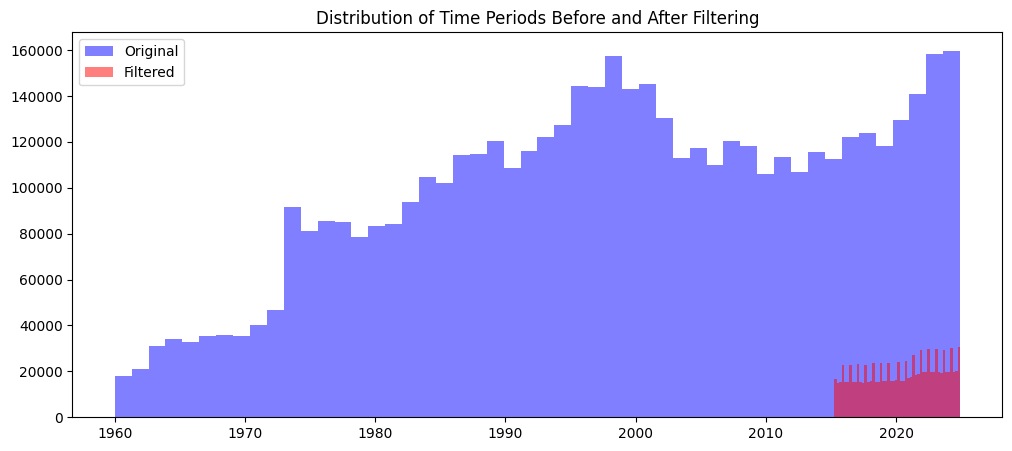

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(data_df['yyyymm'], bins=50, alpha=0.5, label="Original", color='blue')
plt.hist(final_df['yyyymm'], bins=50, alpha=0.5, label="Filtered", color='red')
plt.legend()
plt.title("Distribution of Time Periods Before and After Filtering")
plt.show()


In [16]:
final_df.sort_values(by=['yyyymm'], inplace=True)
final_df.reset_index(drop=True, inplace=True)

final_df

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,MomSeason06YrPlus,MomOffSeason06YrPlus,grcapx,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf
0,24248,2015-04-01,50.30000,-4.6626,-3.918005,-14.704619,4.6626,-0.012760,0.849806,-0.009173,...,0.048973,0.001247,-0.373328,-12.729445,-0.969193,-1.062082,-0.036292,-1.127272,0.393340,0.080879
1,41929,2015-04-01,41.10000,-6.8661,-3.716008,-14.677807,6.8661,-0.022598,0.767794,-0.016282,...,0.100678,0.001858,0.024398,-6.005640,-0.981060,-0.429558,NaN,0.788884,0.813793,0.156578
2,83188,2015-04-01,17.58000,26.2024,-2.866762,-15.755409,-26.2024,-0.075608,0.717258,-0.024569,...,0.116019,-0.002555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86551,2015-04-01,13.64000,-0.2391,-2.613007,-10.532726,0.2391,-0.007427,0.964639,-0.004356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92054,2015-04-01,2.00000,-7.4074,-0.693147,-11.800553,7.4074,-0.055556,0.787402,-0.018997,...,0.065344,0.017323,0.506835,NaN,-0.455054,0.280283,-0.295410,-0.289268,0.963476,-0.139368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,23795,2024-12-01,2.42000,-3.2000,-0.883768,-8.702600,3.2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.221885,NaN,NaN,NaN,NaN
999996,75241,2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.236193,-0.489375,NaN,NaN,NaN,NaN
999997,14532,2024-12-01,27.40000,-9.5710,-3.310543,-13.361761,9.5710,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,21605,2024-12-01,64.16000,-14.9072,-4.161380,-15.898824,14.9072,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.138213,-1.318626,NaN,NaN,NaN,NaN


In [17]:
df = final_df.copy()
# df.to_csv('cleaned_sample.csv', index=False)
# df = df[(df['yyyymm'] >= '1995-01-01') &
#         (df['yyyymm'] <= '2000-12-01')]
# df.reset_index(drop=True, inplace=True)

In [18]:
#remove later
# df = pd.read_csv('cleaned_sample.csv')

In [19]:
#remove later

rf_rates['observation_date'] = pd.to_datetime(rf_rates['observation_date'], format='%Y-%m-%d')
df['yyyymm'] = pd.to_datetime(df['yyyymm'], format='%Y-%m-%d')

# Functions

In [20]:
def estimate_beta_and_save_predictions(df, train_indices, test_indices):
    """
    Estimate beta using training data and save CAPM predictions for test data directly in the dataframe

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with stock returns and market returns
    train_indices : array-like
        Indices for training period
    test_indices : array-like
        Indices for test period

    Returns:
    --------
    DataFrame with beta estimates and CAPM predictions
    """
    # Create a copy of the dataframe
    result_df = df.copy()
    result_df['beta'] = np.nan
    result_df['CAPM_Predicted_ExcessReturn'] = np.nan

    # Process each stock separately
    for permno in df['permno'].unique():
        stock_data = df[df['permno'] == permno]

        # Get training data for this stock
        train_data = stock_data[stock_data.index.isin(train_indices)]

        if len(train_data) > 10:  # Require minimum observations
            # Calculate beta based on training data
            cov_stock_market = np.cov(train_data['ExcessReturn'], train_data['MarketExcessReturn'])[0, 1]
            var_market = np.var(train_data['MarketExcessReturn'])

            if var_market != 0:
                beta = cov_stock_market / var_market

                # Apply this beta to test period observations
                test_indices_for_stock = stock_data.index[stock_data.index.isin(test_indices)]
                result_df.loc[test_indices_for_stock, 'beta'] = beta

                # Calculate CAPM predictions directly
                for idx in test_indices_for_stock:
                    market_excess = result_df.loc[idx, 'MarketExcessReturn']
                    result_df.loc[idx, 'CAPM_Predicted_ExcessReturn'] = beta * market_excess

    return result_df

In [21]:
# Out of sample R2 function
def r2_oos(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum(y_true**2)

In [22]:
def split_with_percentage(df_init, features, target, date_column='date', train_size=0.6, valid_size=0.2, test_size=0.2):
    """
    Split data into train, validation, and test sets based on specified percentages

    Parameters:
    -----------
    df_init : pandas DataFrame
        The complete dataset
    features : list
        List of feature column names
    target : str
        Name of the target column
    date_column : str
        Name of the date column
    train_size : float
        Percentage of data for training (e.g., 0.6 for 60%)
    valid_size : float
        Percentage of data for validation (e.g., 0.2 for 20%)
    test_size : float
        Percentage of data for testing (e.g., 0.2 for 20%)

    Returns:
    --------
    X_train, y_train, X_valid, y_valid, X_test, y_test
    """
    assert train_size + valid_size + test_size == 1, "Train, validation, and test sizes must sum to 1"

    # Ensure date column is datetime
    df = df_init.copy()
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column])

    # Sort by date
    df = df.sort_values(by=date_column)

    # Determine split indices
    n = len(df)
    train_end = int(n * train_size)
    valid_end = train_end + int(n * valid_size)

    # Train set
    train = df.iloc[:train_end]
    X_train, y_train = train[features], train[target]

    # Validation set
    valid = df.iloc[train_end:valid_end]
    X_valid, y_valid = valid[features], valid[target]

    # Test set
    test = df.iloc[valid_end:]
    X_test, y_test = test[features], test[target]

    y_train = y_train.fillna(0)
    y_valid = y_valid.fillna(0)
    y_test = y_test.fillna(0)

    # Print summary
    print(f"Training set: {train[date_column].min().strftime('%Y-%m-%d')} to {train[date_column].max().strftime('%Y-%m-%d')}, {len(X_train)} observations")
    print(f"Validation set: {valid[date_column].min().strftime('%Y-%m-%d')} to {valid[date_column].max().strftime('%Y-%m-%d')}, {len(X_valid)} observations")
    print(f"Test set: {test[date_column].min().strftime('%Y-%m-%d')} to {test[date_column].max().strftime('%Y-%m-%d')}, {len(X_test)} observations")

    return X_train, y_train, X_valid, y_valid, X_test, y_test


In [23]:
from sklearn.preprocessing import MinMaxScaler

def clean_scale_data(X_train, X_valid, X_test):
    """
    Scales data using MinMaxScaler within range [-1, 1] and replaces NaNs with 0 before scaling.

    Parameters:
    -----------
    X_train, X_valid, X_test : pandas DataFrame
        Feature sets for training, validation, and test

    Returns:
    --------
    X_train_scaled, X_valid_scaled, X_test_scaled : pandas DataFrame
        Scaled versions of the input datasets
    """
    # Replace NaNs with 0 before scaling
    X_train = X_train.fillna(0)
    X_valid = X_valid.fillna(0)
    X_test = X_test.fillna(0)

    # Initialize scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Fit on training data and transform all splits
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Clip values outside [-1, 1] to enforce the range
    X_valid_scaled = X_valid_scaled.clip(-1, 1)
    X_test_scaled = X_test_scaled.clip(-1, 1)

    return X_train_scaled, X_valid_scaled, X_test_scaled


# Cleaning, scaling, adding vars

Variables: The dataset includes a unique firm identifier (permno), date,
 stock price (prc), stock return in percentage units adjusted for delisting (ret), and a variable named Signed Price (Price). In addition, there are 114 predictor variables (signals).

In [24]:
# Merge the DataFrames based on the date columns
merged_df = pd.merge(df, rf_rates, left_on='yyyymm',
                        right_on='observation_date', how='left')

In [25]:
merged_df.drop(columns=['observation_date'], inplace=True)
merged_df.rename(columns={'TB3MS': 'riskfree', 'yyyymm': 'date'}, inplace=True)
merged_df.columns = merged_df.columns.str.lower()
merged_df['ExcessReturn'] = merged_df['ret'] - merged_df['riskfree']

merged_df['MarketReturn'] = merged_df.groupby('date')['ret'].transform('mean')
merged_df['MarketExcessReturn'] = merged_df['MarketReturn'] - merged_df['riskfree']

merged_df = merged_df.replace({-np.inf: np.nan, np.inf: np.nan})
merged_df.fillna(0, inplace=True)

merged_df.sort_values(['date', 'permno'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)


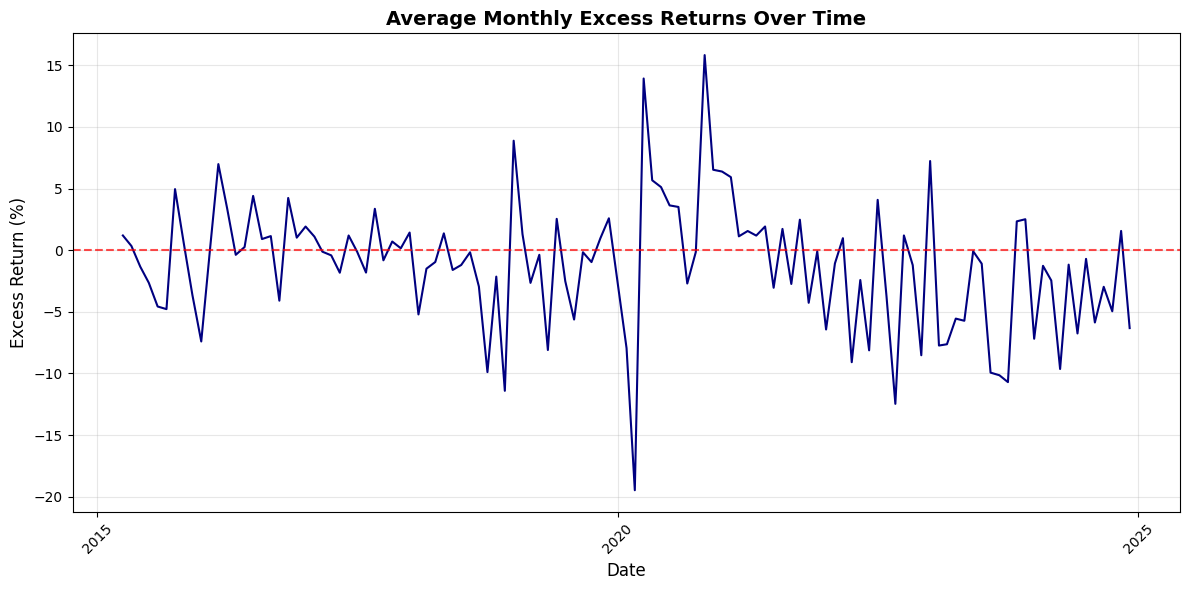

In [26]:
# Calculate monthly average excess return across all stocks
monthly_excess_returns = merged_df.groupby('date')['ExcessReturn'].mean().reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))

# Plot the time series line
plt.plot(monthly_excess_returns['date'], monthly_excess_returns['ExcessReturn'],
         color='navy', linewidth=1.5)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Format the plot
plt.title('Average Monthly Excess Returns Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Excess Return (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Format the x-axis to show years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5))  # Show every 5 years
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

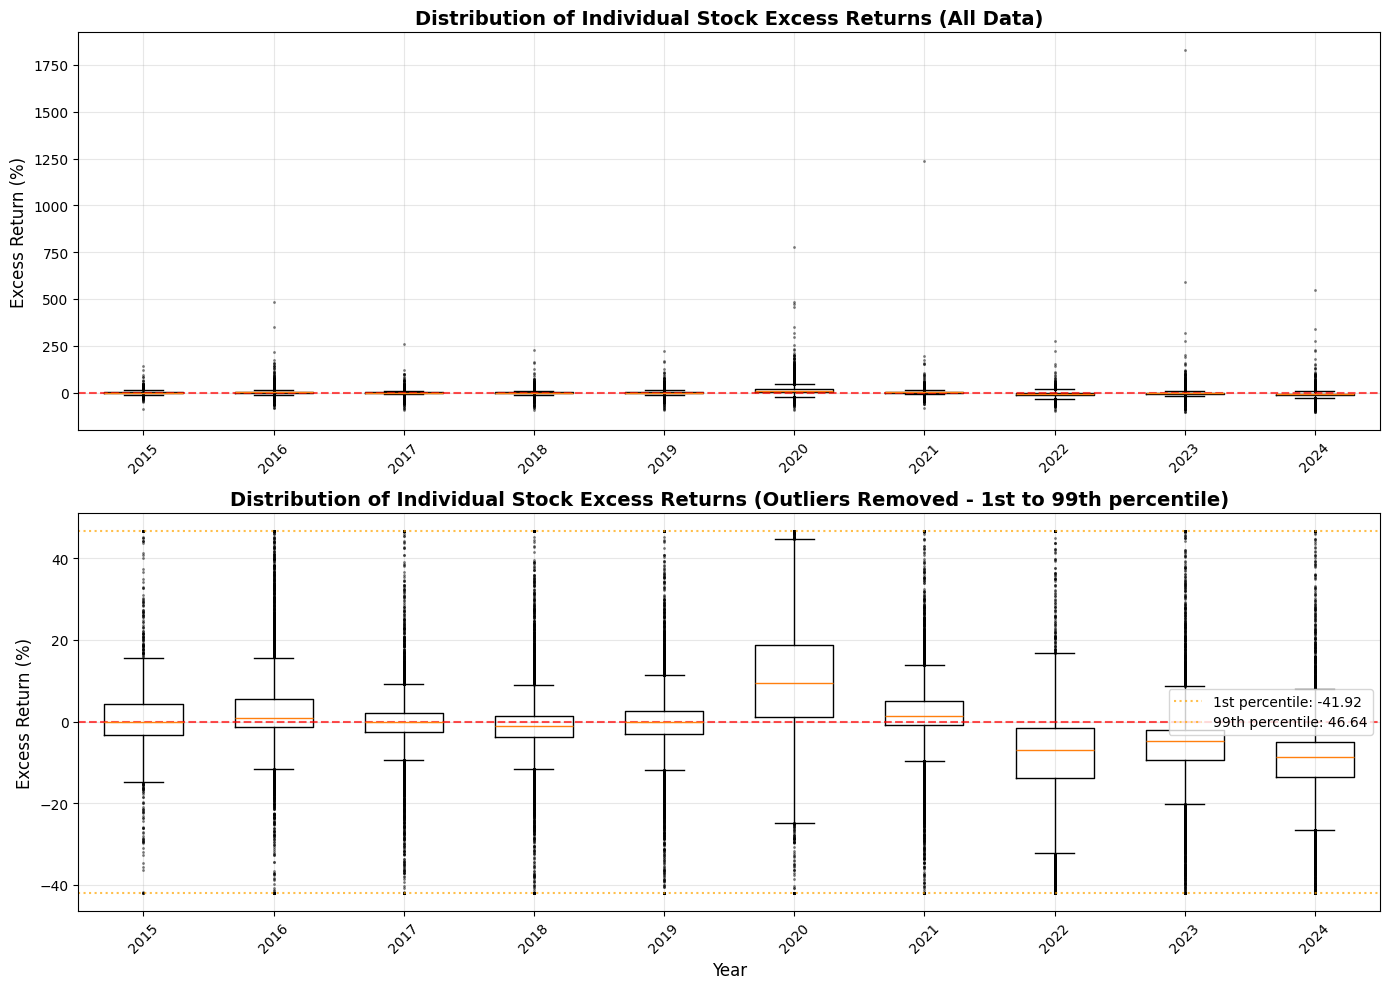

In [27]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1]})

# Sample every nth month to make the plots readable
n = 12  # sample every 12 months (annual)
sample_dates = sorted(merged_df['date'].unique())[::n]

# First subplot - Original data with all outliers
boxplot_data = []
boxplot_positions = []
date_labels = []

for i, date in enumerate(sample_dates):
    date_data = merged_df[merged_df['date'] == date]['ExcessReturn']
    if len(date_data) > 0:
        boxplot_data.append(date_data)
        boxplot_positions.append(i)
        date_labels.append(date.strftime('%Y'))

# Create boxplot in the first subplot - original data
ax1.boxplot(boxplot_data, positions=boxplot_positions, widths=0.6,
           flierprops={'marker': '.', 'markersize': 2, 'alpha': 0.5})
ax1.set_title('Distribution of Individual Stock Excess Returns (All Data)',
             fontsize=14, fontweight='bold')
ax1.set_ylabel('Excess Return (%)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(boxplot_positions)
ax1.set_xticklabels(date_labels, rotation=45)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Second subplot - Data with outliers removed
filtered_boxplot_data = []

# Calculate overall percentiles for consistent clipping across all dates
all_returns = merged_df['ExcessReturn'].dropna()
q_low = all_returns.quantile(0.01)  # 1st percentile
q_high = all_returns.quantile(0.99)  # 99th percentile

for i, date in enumerate(sample_dates):
    date_data = merged_df[merged_df['date'] == date]['ExcessReturn']
    if len(date_data) > 0:
        # Clip values to remove outliers
        filtered_data = np.clip(date_data, q_low, q_high)
        filtered_boxplot_data.append(filtered_data)

# Create boxplot in the second subplot - filtered data
ax2.boxplot(filtered_boxplot_data, positions=boxplot_positions, widths=0.6,
           flierprops={'marker': '.', 'markersize': 2, 'alpha': 0.5})
ax2.set_title(f'Distribution of Individual Stock Excess Returns (Outliers Removed - 1st to 99th percentile)',
             fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Excess Return (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(boxplot_positions)
ax2.set_xticklabels(date_labels, rotation=45)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Add horizontal lines to show clipping thresholds
ax2.axhline(y=q_low, color='orange', linestyle=':', alpha=0.7,
           label=f'1st percentile: {q_low:.2f}')
ax2.axhline(y=q_high, color='orange', linestyle=':', alpha=0.7,
           label=f'99th percentile: {q_high:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

In [28]:
predictor_vars = [c for c in merged_df.columns if c not in ['permno', 'date', 'prc', 'ret',	'price', 'riskfree', 'ExcessReturn', 'MarketReturn', 'MarketExcessReturn']]
len(predictor_vars)

114

In [29]:
X_train, y_train, X_valid, y_valid, X_test, y_test = split_with_percentage(
    df_init=merged_df,
    features=predictor_vars,
    target='ExcessReturn',
    date_column='date',
    train_size=0.3,
    valid_size=0.15,
    test_size=0.55
)


Training set: 2015-04-01 to 2018-07-01, 300000 observations
Validation set: 2018-07-01 to 2020-02-01, 150000 observations
Test set: 2020-02-01 to 2024-12-01, 550000 observations


In [30]:
X_train_scaled, X_valid_scaled, X_test_scaled = clean_scale_data(X_train, X_valid, X_test)

In [31]:
# # make some plots with features
# fig, ax = plt.subplots(figsize=(12, 8))
# sns.heatmap(merged_df.corr(), ax=ax, cmap='coolwarm', center=0)
# plt.title('Correlation Heatmap of Features')
# plt.show()


# CAPM

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Get the indices from your split
train_indices = X_train.index
valid_indices = X_valid.index
test_indices = X_test.index

train_valid_indices = np.concatenate([train_indices, valid_indices])

# Apply the function to calculate beta and save predictions
merged_df_capm = estimate_beta_and_save_predictions(merged_df, train_valid_indices, test_indices)

# Use merged_df_capm instead of merged_df for test_data
test_data = merged_df_capm.loc[test_indices].dropna(subset=['ExcessReturn', 'CAPM_Predicted_ExcessReturn'])

r_squared_capm = r2_oos(test_data['ExcessReturn'], test_data['CAPM_Predicted_ExcessReturn'])
mae_capm = mean_absolute_error(test_data['ExcessReturn'], test_data['CAPM_Predicted_ExcessReturn'])
mse_capm = mean_squared_error(test_data['ExcessReturn'], test_data['CAPM_Predicted_ExcessReturn'])

print(f"CAPM Model Performance on Test Set:")
print(f"R² = {r_squared_capm:.4f}")
print(f"MAE = {mae_capm:.4f}")
print(f"MSE = {mse_capm:.4f}")


CAPM Model Performance on Test Set:
R² = 0.0730
MAE = 8.6736
MSE = 325.4418


In [33]:
test_indices

Index([446980, 446982, 447324, 447323, 447322, 447321, 447320, 447319, 447318,
       447317,
       ...
       993240, 993242, 993243, 993244, 993245, 993246, 993247, 993248, 993241,
       999999],
      dtype='int64', length=550000)

In [34]:
X_test

,size,streversal,maxret,high52,realizedvol,idiovol3f,returnskew3f,returnskew,idiovolaht,zerotrade1m,...,momseason06yrplus,momoffseason06yrplus,grcapx,entmult,investment,pcttotacc,earnsupbig,earningssurprise,betatailrisk,cboperprof
446980,-9.552115,8.7738,-0.022645,0.891697,-0.018036,-0.003176,1.100944,0.913945,-0.003612,1.506532e-08,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
446982,-9.379254,8.8904,-0.015903,0.890105,-0.016062,-0.002162,2.708607,1.259488,-0.002947,1.500000e+01,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
447324,-13.692788,14.5362,-0.016384,0.829308,-0.021123,-0.014860,0.994105,1.257450,-0.021011,1.308607e-08,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
447323,-12.930718,-1.3752,-0.003902,1.006829,-0.002264,-0.001810,0.049644,0.348440,-0.002638,3.094677e-08,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
447322,-10.160917,9.5448,-0.016792,0.870979,-0.016406,-0.002227,0.632370,1.071102,-0.002965,5.758858e-09,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993246,-11.891020,-22.3137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.000000,0.615299,0.0,0.0,0.0,0.0
993247,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.577894,0.572024,0.0,0.0,0.0,0.0
993248,-14.121803,6.8563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,-2.397486,6.327876,0.0,0.0,0.0,0.0
993241,-11.031481,8.4507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,-0.402162,0.738217,0.0,0.0,0.0,0.0


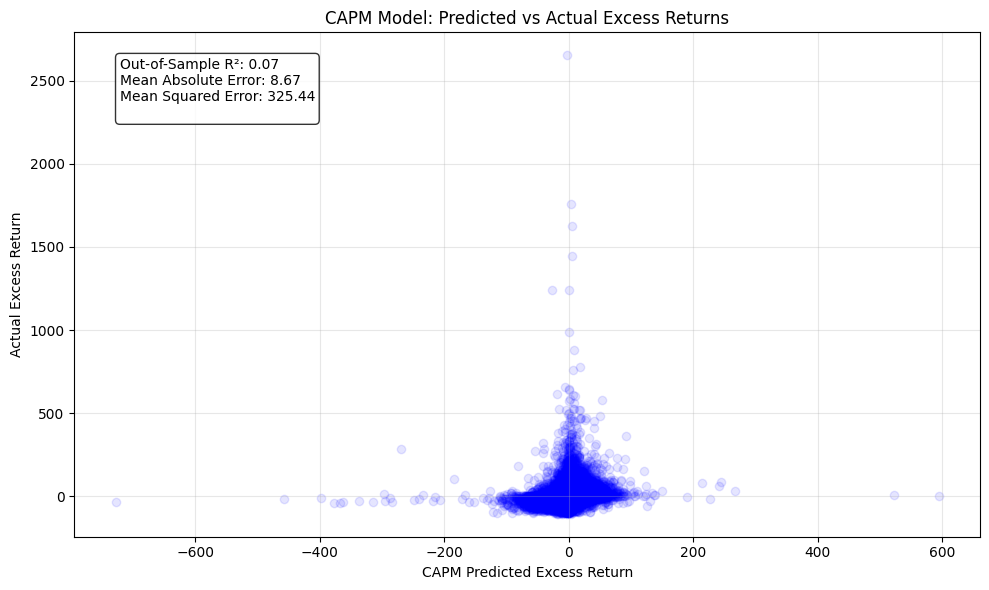

In [35]:
plt.figure(figsize=(10, 6))

# Get the test data and drop rows with missing values
test_data = merged_df_capm.loc[test_indices]

# Create the scatter plot
plt.scatter(test_data['CAPM_Predicted_ExcessReturn'],
           test_data['ExcessReturn'],
           alpha=0.1,  # Make points semi-transparent due to potential overlap
           color='blue')

metrics_text = (
    f"Out-of-Sample R²: {r_squared_capm:.2f}\n"
    f"Mean Absolute Error: {mae_capm:.2f}\n"
    f"Mean Squared Error: {mse_capm:.2f}\n"
)

plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


# Add a title and labels
plt.title('CAPM Model: Predicted vs Actual Excess Returns')
plt.xlabel('CAPM Predicted Excess Return')
plt.ylabel('Actual Excess Return')

# Add a grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


CAPM:  E[return] = risk_free + betta*(E[market_ret] - risk_free)


E[market_ret] - risk_free is market risk premium

Important observations:

- Scale Discrepancy: Yes, there's a significant scale difference between the predicted and actual values. While CAPM predictions mostly fall within about -60 to +60, the actual excess returns have extreme outliers reaching up to 1750. This indicates that CAPM fails to capture extreme market movements.
- Concentration around Zero: The majority of points form a dense cloud centered around zero for both predicted and actual returns. This suggests that most of the time, both CAPM predictions and actual returns are modest in magnitude.
- Poor Predictive Power: There's only a very weak relationship between the predicted and actual values. If CAPM were a perfect predictor, points would follow a diagonal line from bottom-left to top-right. Instead, we see an almost horizontal elliptical cloud, suggesting that CAPM predictions have limited ability to explain variation in actual returns.
- Asymmetric Outliers: The presence of extreme positive outliers (actual returns reaching 1750) but no corresponding extreme negative outliers might indicate either a data issue or a real phenomenon where stocks can experience dramatic upside movement that the CAPM model completely fails to anticipate.
- Prediction Range: CAPM's predictions are much more conservative than the actual volatility observed in the market. The model predicts within a narrower band than what actually occurs.

This graph illustrates a classic challenge in financial modeling - linear models like CAPM struggle to capture the fat-tailed nature of financial returns. This is precisely why machine learning approaches that can model nonlinear relationships might offer significant improvements over traditional CAPM.

# --------------------------

# ML models

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
import time
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
from sklearn.inspection import permutation_importance
import matplotlib.gridspec as gridspec
from sklearn.model_selection import PredefinedSplit, ParameterGrid
from joblib import Parallel, delayed


In [37]:

# # Check for GPU availability
# try:
#     import torch
#     gpu_available = torch.cuda.is_available()
#     if gpu_available:
#         gpu_name = torch.cuda.get_device_name(0)
# except ImportError:
#     gpu_available = False


# Functions

In [38]:
def evaluate_model(model, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test):
    print(f"---{model_name} Evaluation---")

    print(f"\nTraining...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f"Training completed in {train_time:.2f} seconds")

    train_pred = model.predict(X_train)

    print("\nGenerating predictions...")
    start_time = time.time()
    valid_pred = model.predict(X_valid)
    test_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    print(f"Prediction completed in {pred_time:.2f} seconds")

    print("\nCalculating metrics...")
    results = {
        'train_mse': mean_squared_error(y_train, train_pred),
        'train_r2_oos': r2_oos(y_train, train_pred),
        'valid_mse': mean_squared_error(y_valid, valid_pred),
        'valid_r2_oos': r2_oos(y_valid, valid_pred),
        'test_mse': mean_squared_error(y_test, test_pred),
        'test_r2_oos': r2_oos(y_test, test_pred),
        'train_time': train_time,
        'pred_time': pred_time #test + valid
    }

    results['train_pred'] = train_pred
    results['valid_pred'] = valid_pred
    results['test_pred'] = test_pred

    print(f"""Train R² OOS: {results['train_r2_oos']:.2f} \nValidation R² OOS: {results['valid_r2_oos']:.2f} \nTest R² OOS: {results['test_r2_oos']:.2f}
              """)

    return results

In [39]:
# Assuming X_train is your preprocessed training data
# (the data should be standardized before PCA)

def plot_pca_explained_variance(X, max_components=None):
    """
    Create a PCA explained variance plot to help choose the number of components.
    """
    # Determine maximum number of components
    if max_components is None:
        max_components = min(X.shape[0], X.shape[1])
    else:
        max_components = min(max_components, min(X.shape[0], X.shape[1]))

    # Fit PCA
    pca = PCA(n_components=max_components)
    pca.fit(X)

    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', linewidth=2)
    plt.grid(True, alpha=0.6)
    plt.xlabel('Number of Components', fontsize=12)
    plt.ylabel('Cumulative Explained Variance', fontsize=12)
    plt.title('PCA Explained Variance', fontsize=14)

    if len(cumulative_variance) > 10:  # Only calculate elbow if we have enough points
        # Calculate approximate second derivative (discrete)
        diffs = np.diff(cumulative_variance, 2)
        elbow_index = np.argmin(diffs) + 2  # +2 because of two diff operations

        # Mark the elbow point
        plt.plot(elbow_index + 1, cumulative_variance[elbow_index], 'ko', markersize=8)
        plt.axvline(x=elbow_index + 1, color='k', linestyle='--', alpha=0.7)
        plt.annotate(f'Elbow: {elbow_index + 1} components\n({cumulative_variance[elbow_index]:.2f} variance)',
                    xy=(elbow_index + 1, cumulative_variance[elbow_index]),
                    xytext=(elbow_index + 10, cumulative_variance[elbow_index] - 0.1),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5)
    plt.annotate('95% explained variance',
                xy=(max_components/2, 0.95),
                xytext=(max_components/2, 0.9),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
                ha='center')

    plt.tight_layout()
    plt.show()

    return {
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'cumulative_variance': cumulative_variance,
        'n_components_95': np.argmax(cumulative_variance >= 0.95) + 1,
        'elbow_point': elbow_index + 1 if len(cumulative_variance) > 10 else None
    }


In [40]:
def pls_predict(model, X):
    pred = model.predict(X)
    # Ensure output is 1D
    if pred.ndim > 1 and pred.shape[1] == 1:
        pred = pred.ravel()
    return pred

In [41]:
# PLS-specific evaluation function
def evaluate_model_pls(model, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test):
    print(f"Training PLS...")
    start_time = time.time()

    model.fit(X_train, y_train)

    train_time = time.time() - start_time
    print(f"Training completed in {train_time:.2f} seconds")

    print("Generating predictions...")
    start_time = time.time()

    # Direct prediction without unpacking
    train_pred = model.predict(X_train)
    if train_pred.ndim > 1 and train_pred.shape[1] == 1:
        train_pred = train_pred.ravel()

    valid_pred = model.predict(X_valid)
    if valid_pred.ndim > 1 and valid_pred.shape[1] == 1:
        valid_pred = valid_pred.ravel()

    test_pred = model.predict(X_test)
    if test_pred.ndim > 1 and test_pred.shape[1] == 1:
        test_pred = test_pred.ravel()

    pred_time = time.time() - start_time
    print(f"Prediction completed in {pred_time:.2f} seconds")

    print("Calculating metrics...")
    train_mse = mean_squared_error(y_train, train_pred)
    train_r2_oos = r2_oos(y_train, train_pred)
    valid_mse = mean_squared_error(y_valid, valid_pred)
    valid_r2_oos = r2_oos(y_valid, valid_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    test_r2_oos = r2_oos(y_test, test_pred)

    results = {
        'train_mse': train_mse,
        'train_r2_oos': train_r2_oos,
        'valid_mse': valid_mse,
        'valid_r2_oos': valid_r2_oos,
        'test_mse': test_mse,
        'test_r2_oos': test_r2_oos,
        'train_time': train_time,
        'pred_time': pred_time
    }

    results['train_pred'] = train_pred
    results['valid_pred'] = valid_pred
    results['test_pred'] = test_pred

    print(f"Train R² OOS: {train_r2_oos:.2f}")
    print(f"Validation R² OOS: {valid_r2_oos:.2f}")
    print(f"Test R² OOS: {test_r2_oos:.2f}")

    return results

In [42]:
def get_feature_importance(model, X, y, feature_names):
    """
    Extract feature importance from different types of models.
    For tree-based models, use built-in feature_importances_.
    For linear models, use coefficient magnitude.
    For other models, calculate permutation importance.
    """
    importances = None
    used_feature_names = feature_names

    # For tree-based models
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

    # For linear models
    elif hasattr(model, 'coef_'):
        # For multi-output models, take mean of coefficients
        if model.coef_.ndim > 1:
            importances = np.abs(model.coef_).mean(axis=0)
        else:
            importances = np.abs(model.coef_)

    # For PLS
    elif hasattr(model, 'x_loadings_'):
        # This is a simplified approach for PLS
        importances = np.abs(model.x_loadings_).sum(axis=1)

    # For Pipeline objects
    elif hasattr(model, 'steps'):
        # Try to get importances from the last step
        final_step = model.steps[-1][1]

        # For PCA + Linear Regression pipeline, we need to check the transformed feature count
        if 'pca' in [name for name, _ in model.steps]:
            pca_step = model.named_steps['pca']
            n_components = pca_step.n_components_
            # Create generic feature names for PCA components
            used_feature_names = [f'PC_{i+1}' for i in range(n_components)]

            # Get importances from final step
            if hasattr(final_step, 'coef_'):
                if final_step.coef_.ndim > 1:
                    importances = np.abs(final_step.coef_).mean(axis=0)
                else:
                    importances = np.abs(final_step.coef_)
        # For polynomial + linear regression
        elif 'poly' in [name for name, _ in model.steps]:
            poly_step = model.named_steps['poly']
            # We would need feature names from the transformed data
            # For now, just use generic names
            if hasattr(final_step, 'coef_'):
                importances = np.abs(final_step.coef_)
                used_feature_names = [f'poly_feature_{i}' for i in range(len(importances))]
        else:
            if hasattr(final_step, 'feature_importances_'):
                importances = final_step.feature_importances_
            elif hasattr(final_step, 'coef_'):
                if final_step.coef_.ndim > 1:
                    importances = np.abs(final_step.coef_).mean(axis=0)
                else:
                    importances = np.abs(final_step.coef_)

    # Fallback: use permutation importance
    if importances is None:
        # This is computationally expensive but works for any model
        try:
            perm_importance = permutation_importance(model, X, y, n_repeats=5, random_state=42)
            importances = perm_importance.importances_mean
        except Exception as e:
            print(f"Could not compute permutation importance for {model.__class__.__name__}: {str(e)}")
            # Just return dummy data to avoid errors
            importances = np.ones(len(used_feature_names))

    # Handle the case where importances length doesn't match feature_names length
    if importances is not None and len(importances) != len(used_feature_names):
        print(f"Warning: Importance array length ({len(importances)}) doesn't match feature names length ({len(used_feature_names)})")
        # Create generic feature names of the correct length
        used_feature_names = [f'feature_{i}' for i in range(len(importances))]

    # Create DataFrame with feature names and importances
    importance_df = pd.DataFrame({
        'feature': used_feature_names,
        'importance': importances
    })

    # Normalize importances to sum to 1
    if importance_df['importance'].sum() > 0:
        importance_df['importance'] = importance_df['importance'] / importance_df['importance'].sum()

    # Sort by importance
    return importance_df.sort_values('importance', ascending=False)
# Function to create the feature importance plot


In [43]:
def plot_feature_importance(model_results, models, X_train, y_train, feature_names, n_features=20, ncols=2, figsize=(16, 24)):
    # Filter models that have been trained
    model_names = [name for name in models.keys() if name in model_results]

    # Calculate number of rows needed
    nrows = (len(model_names) + ncols - 1) // ncols

    # Create figure
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nrows, ncols)

    # Process each model
    for i, model_name in enumerate(model_names):
        # Get row and column for subplot
        row, col = i // ncols, i % ncols
        ax = fig.add_subplot(gs[row, col])

        # Get model
        model = models[model_name]

        # Get feature importance
        importance_df = get_feature_importance(model, X_train, y_train, feature_names)

        # Select top n features
        top_features = importance_df.head(n_features)

        # Plot horizontal bar chart
        ax.barh(np.arange(len(top_features)), top_features['importance'], color='steelblue')
        ax.set_yticks(np.arange(len(top_features)))
        ax.set_yticklabels(top_features['feature'])
        ax.set_title(model_name)
        ax.set_xlabel('Importance')
        ax.invert_yaxis()  # To have the most important feature at the top
        ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return fig


# ------------

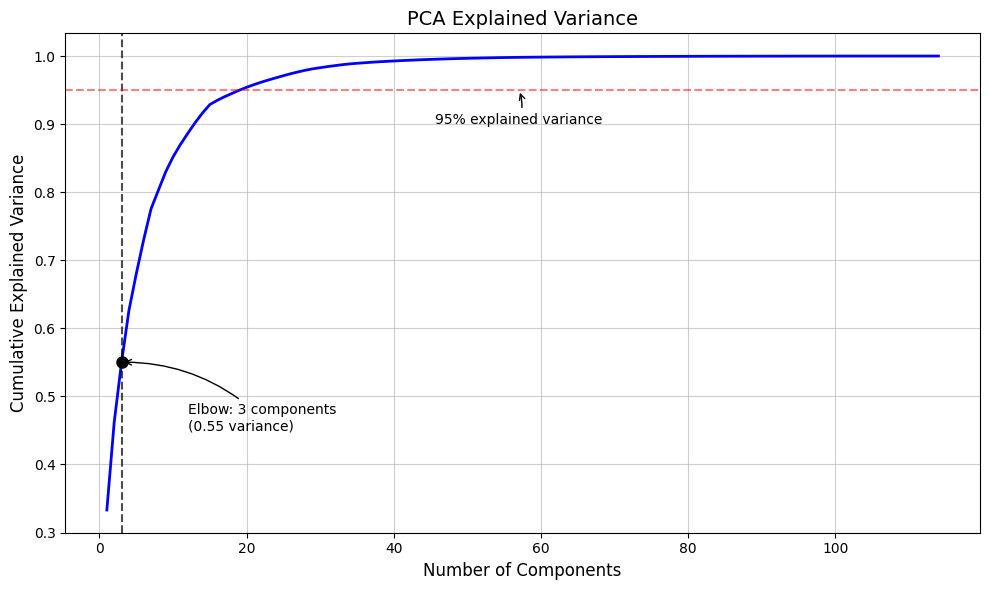

Number of components needed for 95% variance: 20
Elbow point occurs at 3 components


In [44]:
variance_info = plot_pca_explained_variance(X_train_scaled, max_components=130)

print(f"Number of components needed for 95% variance: {variance_info['n_components_95']}")
if variance_info['elbow_point']:
    print(f"Elbow point occurs at {variance_info['elbow_point']} components")


In [45]:
N_PC = 20

In [46]:
models = {
    'Linear Regression': LinearRegression(),

    # Regularized regression models
    'Ridge': Ridge(alpha=10.0, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42, max_iter=5000),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=42, max_iter=5000),


    'Linear Regression with PCA': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('linear', LinearRegression())
    ]),

    'Ridge with PCA': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('ridge', Ridge(alpha=10.0, random_state=42))
    ]),

    'Lasso with PCA': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('lasso', Lasso(alpha=0.1, random_state=42, max_iter=5000))
    ]),

    'Elastic Net with PCA': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=42, max_iter=5000))
    ]),

    # Dimensionality reduction models
    'Principal Component Regression': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('ridge', Ridge(alpha=10.0, random_state=42))
    ]),

    'Partial Least Squares': PLSRegression(n_components=N_PC, scale=False),

    'Polynomial Regression': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ('ridge', Ridge(alpha=10.0, random_state=42))
    ])

}

In [47]:
print(f"\nStarting model training and evaluation...\n")

model_results = {}

for name in tqdm(list(models.keys()), desc="Models"):
    model = models[name]

    # Special handling for PLS which has different predict behavior
    if name == 'Partial Least Squares':
        model_results[name] = evaluate_model_pls(
            model, name,
            X_train_scaled[predictor_vars], y_train,
            X_valid_scaled[predictor_vars], y_valid,
            X_test_scaled[predictor_vars], y_test
        )
    else:
        model_results[name] = evaluate_model(
            model, name,
            X_train_scaled[predictor_vars], y_train,
            X_valid_scaled[predictor_vars], y_valid,
            X_test_scaled[predictor_vars], y_test
        )


Starting model training and evaluation...



Models:   0%|          | 0/11 [00:00<?, ?it/s]

---Linear Regression Evaluation---

Training...
Training completed in 2.46 seconds

Generating predictions...
Prediction completed in 0.11 seconds

Calculating metrics...
Train R² OOS: 1.00 
Validation R² OOS: 0.99 
Test R² OOS: 0.95
              


Models:   9%|▉         | 1/11 [00:04<00:45,  4.59s/it]

---Ridge Evaluation---

Training...


Models:  18%|█▊        | 2/11 [00:05<00:22,  2.53s/it]

Training completed in 0.38 seconds

Generating predictions...
Prediction completed in 0.08 seconds

Calculating metrics...
Train R² OOS: 0.98 
Validation R² OOS: 0.97 
Test R² OOS: 0.93
              
---Lasso Evaluation---

Training...


Models:  27%|██▋       | 3/11 [00:07<00:16,  2.05s/it]

Training completed in 0.77 seconds

Generating predictions...
Prediction completed in 0.08 seconds

Calculating metrics...
Train R² OOS: 0.77 
Validation R² OOS: 0.75 
Test R² OOS: 0.70
              
---Elastic Net Evaluation---

Training...


Models:  36%|███▋      | 4/11 [00:08<00:12,  1.79s/it]

Training completed in 0.66 seconds

Generating predictions...
Prediction completed in 0.09 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
---Linear Regression with PCA Evaluation---

Training...
Training completed in 0.42 seconds

Generating predictions...


Models:  45%|████▌     | 5/11 [00:09<00:09,  1.60s/it]

Prediction completed in 0.20 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
---Ridge with PCA Evaluation---

Training...
Training completed in 0.25 seconds

Generating predictions...


Models:  55%|█████▍    | 6/11 [00:10<00:07,  1.44s/it]

Prediction completed in 0.18 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
---Lasso with PCA Evaluation---

Training...
Training completed in 0.28 seconds

Generating predictions...


Models:  64%|██████▎   | 7/11 [00:12<00:05,  1.34s/it]

Prediction completed in 0.17 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
---Elastic Net with PCA Evaluation---

Training...
Training completed in 0.29 seconds

Generating predictions...


Models:  73%|███████▎  | 8/11 [00:13<00:03,  1.28s/it]

Prediction completed in 0.18 seconds

Calculating metrics...
Train R² OOS: 0.10 
Validation R² OOS: 0.09 
Test R² OOS: 0.04
              
---Principal Component Regression Evaluation---

Training...
Training completed in 0.26 seconds

Generating predictions...


Models:  82%|████████▏ | 9/11 [00:14<00:02,  1.23s/it]

Prediction completed in 0.18 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
Training PLS...
Training completed in 6.08 seconds
Generating predictions...


Models:  91%|█████████ | 10/11 [00:21<00:03,  3.16s/it]

Prediction completed in 0.80 seconds
Calculating metrics...
Train R² OOS: 0.88
Validation R² OOS: 0.88
Test R² OOS: 0.87
---Polynomial Regression Evaluation---

Training...
Training completed in 1.54 seconds

Generating predictions...


Models: 100%|██████████| 11/11 [00:26<00:00,  2.41s/it]

Prediction completed in 1.78 seconds

Calculating metrics...
Train R² OOS: 0.20 
Validation R² OOS: 0.17 
Test R² OOS: 0.09
              


In [48]:
print("\nModel Comparison (Test R² OOS):")
print(f'CAPM: {r_squared_capm:.3f}')
for name, results in model_results.items():
    print(f"{name}:\n test:{results['test_r2_oos']:.3f} train:{results['train_r2_oos']:.3f} val:{results['valid_r2_oos']:.3f}")


Model Comparison (Test R² OOS):
CAPM: 0.073
Linear Regression:
 test:0.950 train:0.999 val:0.989
Ridge:
 test:0.926 train:0.982 val:0.968
Lasso:
 test:0.702 train:0.768 val:0.746
Elastic Net:
 test:0.051 train:0.115 val:0.097
Linear Regression with PCA:
 test:0.050 train:0.123 val:0.102
Ridge with PCA:
 test:0.050 train:0.123 val:0.102
Lasso with PCA:
 test:0.050 train:0.119 val:0.100
Elastic Net with PCA:
 test:0.041 train:0.104 val:0.085
Principal Component Regression:
 test:0.050 train:0.123 val:0.102
Partial Least Squares:
 test:0.865 train:0.875 val:0.875
Polynomial Regression:
 test:0.086 train:0.195 val:0.171


In [49]:
def plot_overfitting_assessment(model_results, r_squared_capm):
    """
    Create a visualization to detect overfitting by comparing R² across training, validation and test sets
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Extract model names and R² values
    model_names = ['CAPM'] + list(model_results.keys())
    train_r2 = [np.nan]  # CAPM doesn't have train R²
    valid_r2 = [np.nan]  # CAPM doesn't have validation R²
    test_r2 = [r_squared_capm]

    for name, results in model_results.items():
        train_r2.append(results['train_r2_oos'])
        valid_r2.append(results['valid_r2_oos'])
        test_r2.append(results['test_r2_oos'])

    # Set up the plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Set width of bars
    bar_width = 0.25

    # Set position of bars on x axis
    r1 = np.arange(len(model_names))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Create bars
    train_bars = ax.bar(r1, train_r2, width=bar_width, label='Train', color='skyblue', alpha=0.8)
    valid_bars = ax.bar(r2, valid_r2, width=bar_width, label='Validation', color='lightgreen', alpha=0.8)
    test_bars = ax.bar(r3, test_r2, width=bar_width, label='Test', color='salmon', alpha=0.8)

    # Add labels and title
    ax.set_xlabel('Models', fontweight='bold', fontsize=12)
    ax.set_ylabel('R² OOS', fontweight='bold', fontsize=12)
    ax.set_title('Model Performance Comparison Across Datasets', fontweight='bold', fontsize=14)
    ax.set_xticks([r + bar_width for r in range(len(model_names))])
    ax.set_xticklabels(model_names, rotation=45, ha='right')

    # Add a horizontal line at y=0
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # Add legend
    ax.legend()

    # Add a grid
    ax.grid(True, linestyle='--', alpha=0.3)

    # Use red color for bars when there's a significant train-test gap
    overfitting_threshold = 0.15  # Adjust as needed

    for i in range(1, len(model_names)):  # Skip CAPM
        if train_r2[i] is not None and test_r2[i] is not None:
            gap = train_r2[i] - test_r2[i]

            # Add gap text above the bars without arrows or "Potential overfitting" text
            if gap > 0:
                ax.text(r1[i] + bar_width, max(train_r2[i], valid_r2[i] if valid_r2[i] is not None else 0) + 0.02,
                       f'Gap: {gap:.2f}', ha='center', fontsize=9,
                       color='red' if gap > overfitting_threshold else 'blue')


    plt.tight_layout()
    return fig

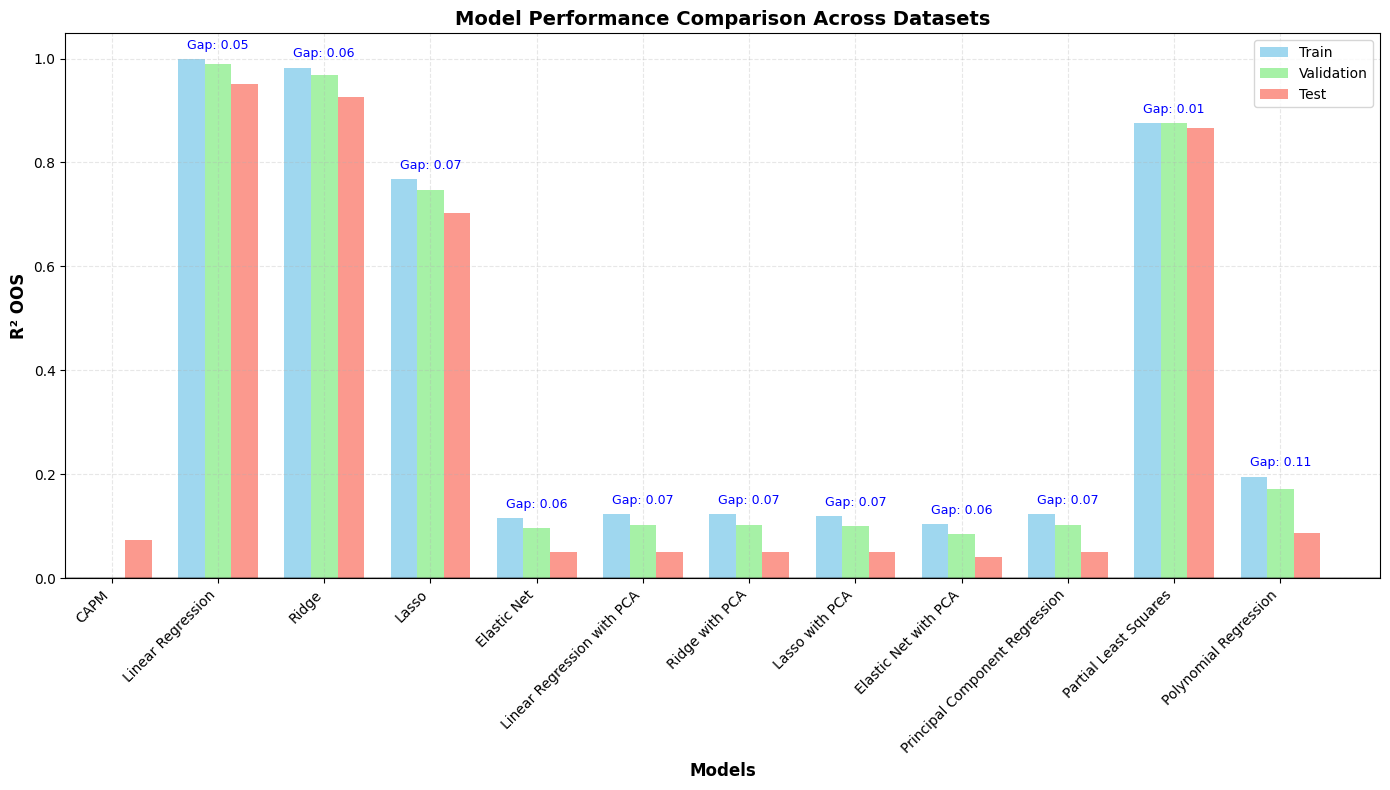

In [50]:
fig2 = plot_overfitting_assessment(model_results, r_squared_capm)
plt.show()

In [51]:
import math

def plot_model_comparison(model_results, merged_df_capm, test_indices, y_test):
    # Determine the grid layout based on number of models
    num_models = len(model_results)
    cols = min(3, num_models)  # Maximum 3 columns
    rows = math.ceil(num_models / cols)

    # Create the figure and subplots
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True, sharey=True)

    # Flatten axs if it's a multi-dimensional array
    if rows > 1 or cols > 1:
        axs = axs.flatten()
    else:
        axs = [axs]  # Convert to list if there's only one subplot

    # Get test data for CAPM
    test_data = merged_df_capm.loc[test_indices]

    # Plot each model in its own subplot
    for i, (name, results) in enumerate(model_results.items()):
        model_pred = results['test_pred']

        # Plot model prediction also with reduced transparency
        axs[i].scatter(model_pred, y_test,
                    alpha=0.15,  # Higher alpha to stand out against CAPM
                    color='green',
                    label=name)


        # Plot CAPM prediction with reduced transparency
        axs[i].scatter(test_data['CAPM_Predicted_ExcessReturn'],
                    test_data['ExcessReturn'],
                    alpha=0.05,  # Reduced transparency for better visibility
                    color='blue',
                    label='CAPM')


        # Add subplot title and labels
        axs[i].set_title(f'{name} vs CAPM')
        axs[i].set_xlabel('Predicted Excess Return')
        axs[i].set_ylabel('Actual Excess Return')
        axs[i].grid(True, alpha=0.2)
        axs[i].legend()

        # Add performance metrics as text
        metrics_text = (
            f"{name} R² OOS: {results['test_r2_oos']:.4f}\n"
            f"CAPM R² OOS: {r_squared_capm:.4f}"
        )
        axs[i].text(0.05, 0.95, metrics_text,
                transform=axs[i].transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Hide any unused subplots
    for j in range(num_models, len(axs)):
        axs[j].set_visible(False)

    # Add general title to the entire figure
    plt.suptitle('Comparison of Machine Learning Models vs CAPM Benchmark',
                fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout()
    fig.subplots_adjust(top=0.93)  # Make room for the suptitle

    plt.show()


/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_54618/811107011.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/arshad/Documents/prog/python/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


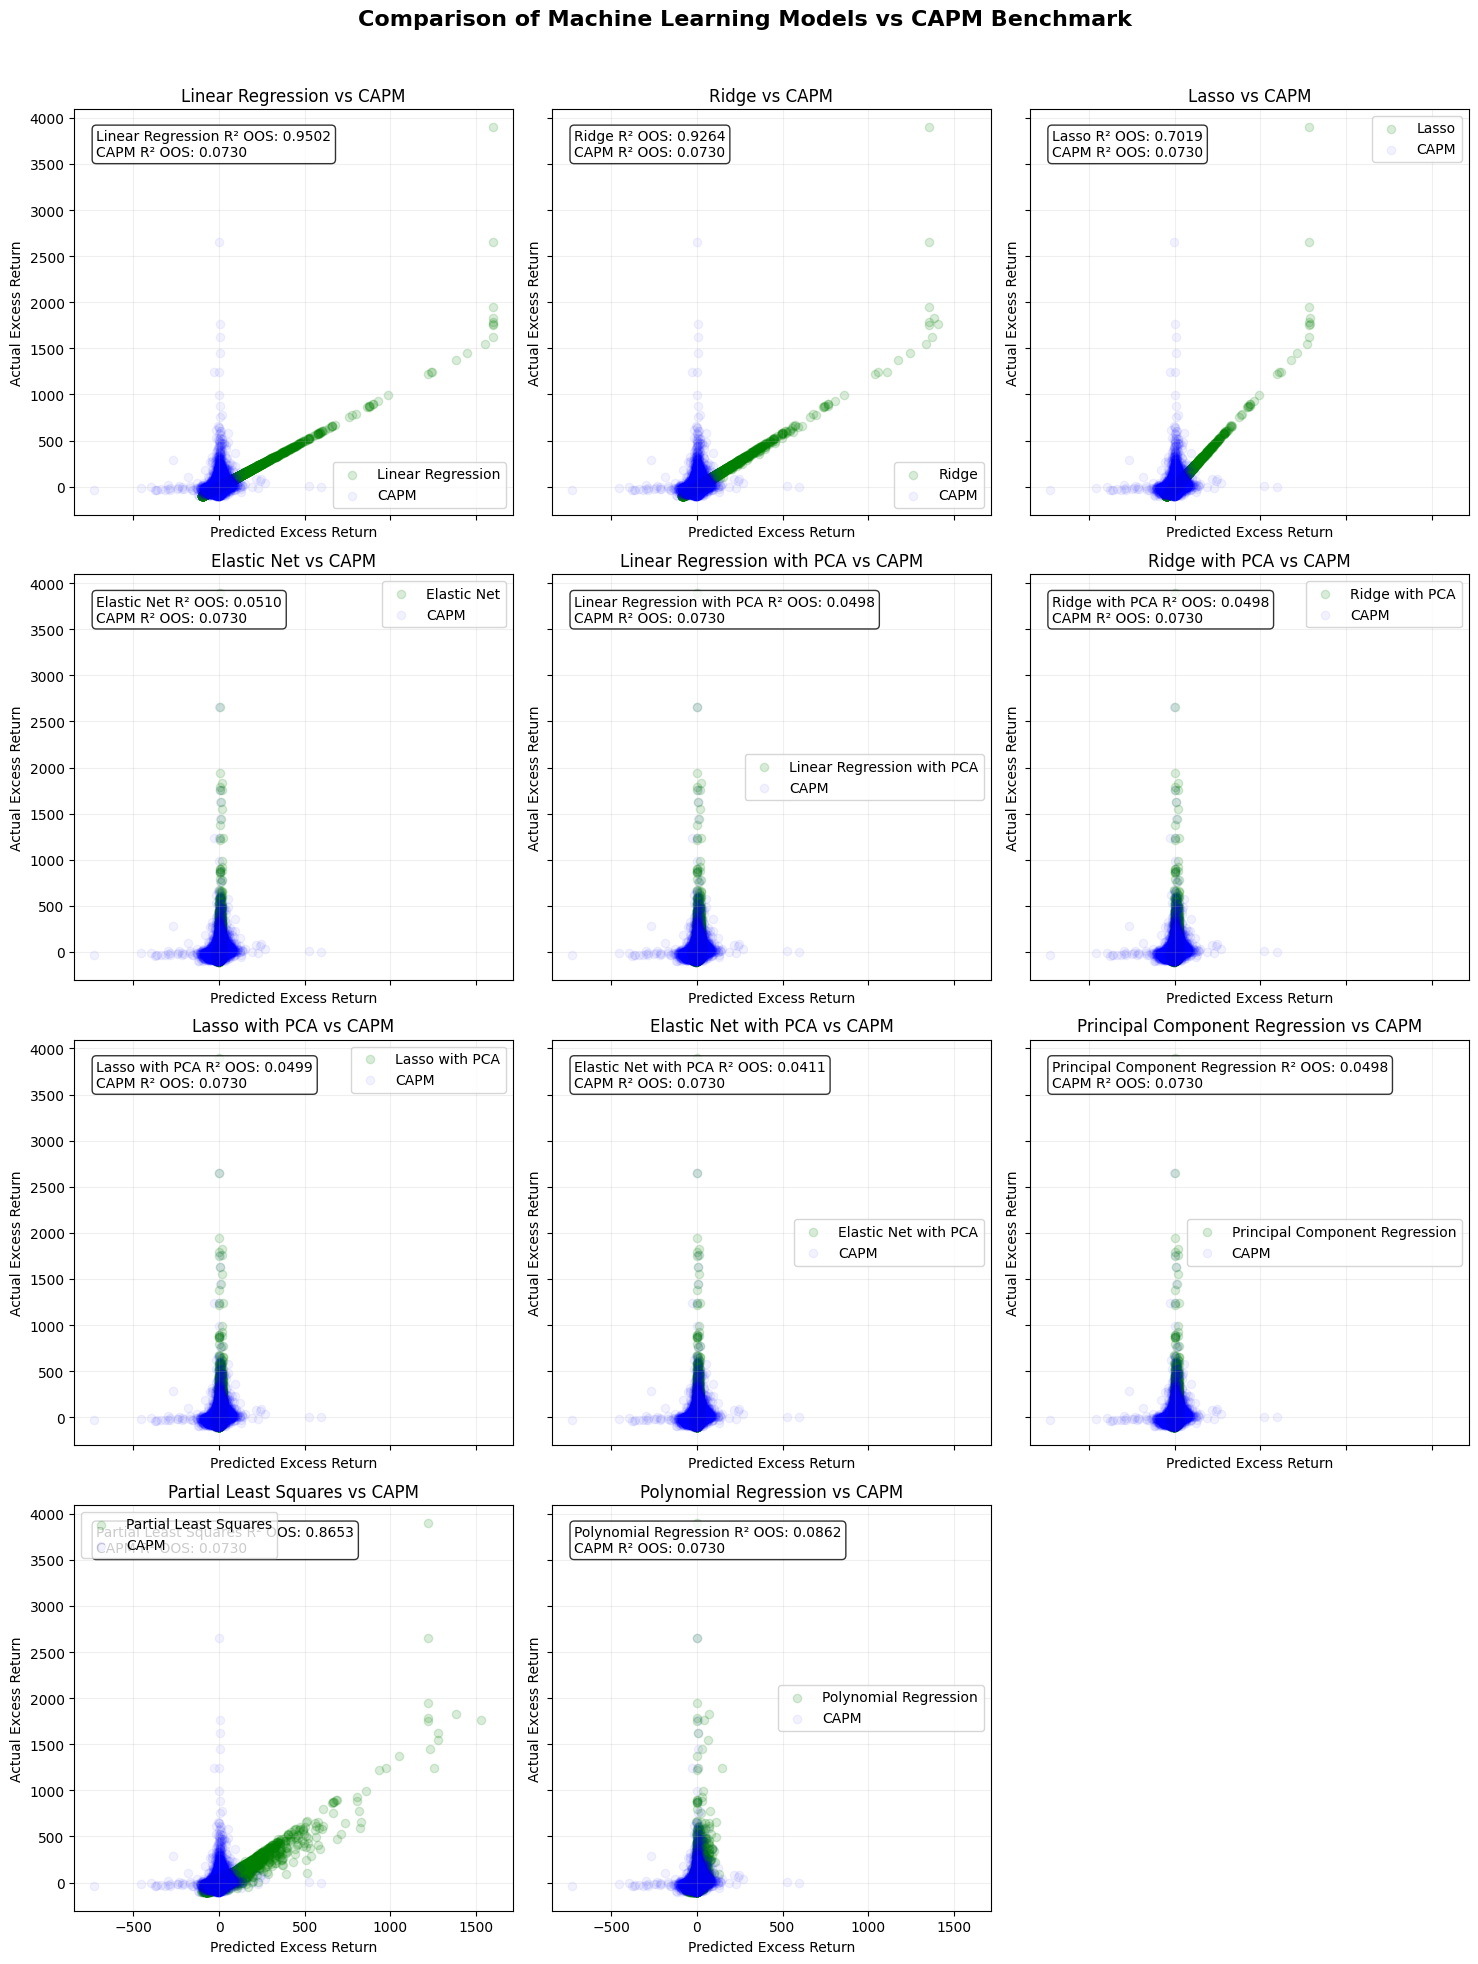

In [52]:
plot_model_comparison(model_results, merged_df_capm, test_indices, y_test)

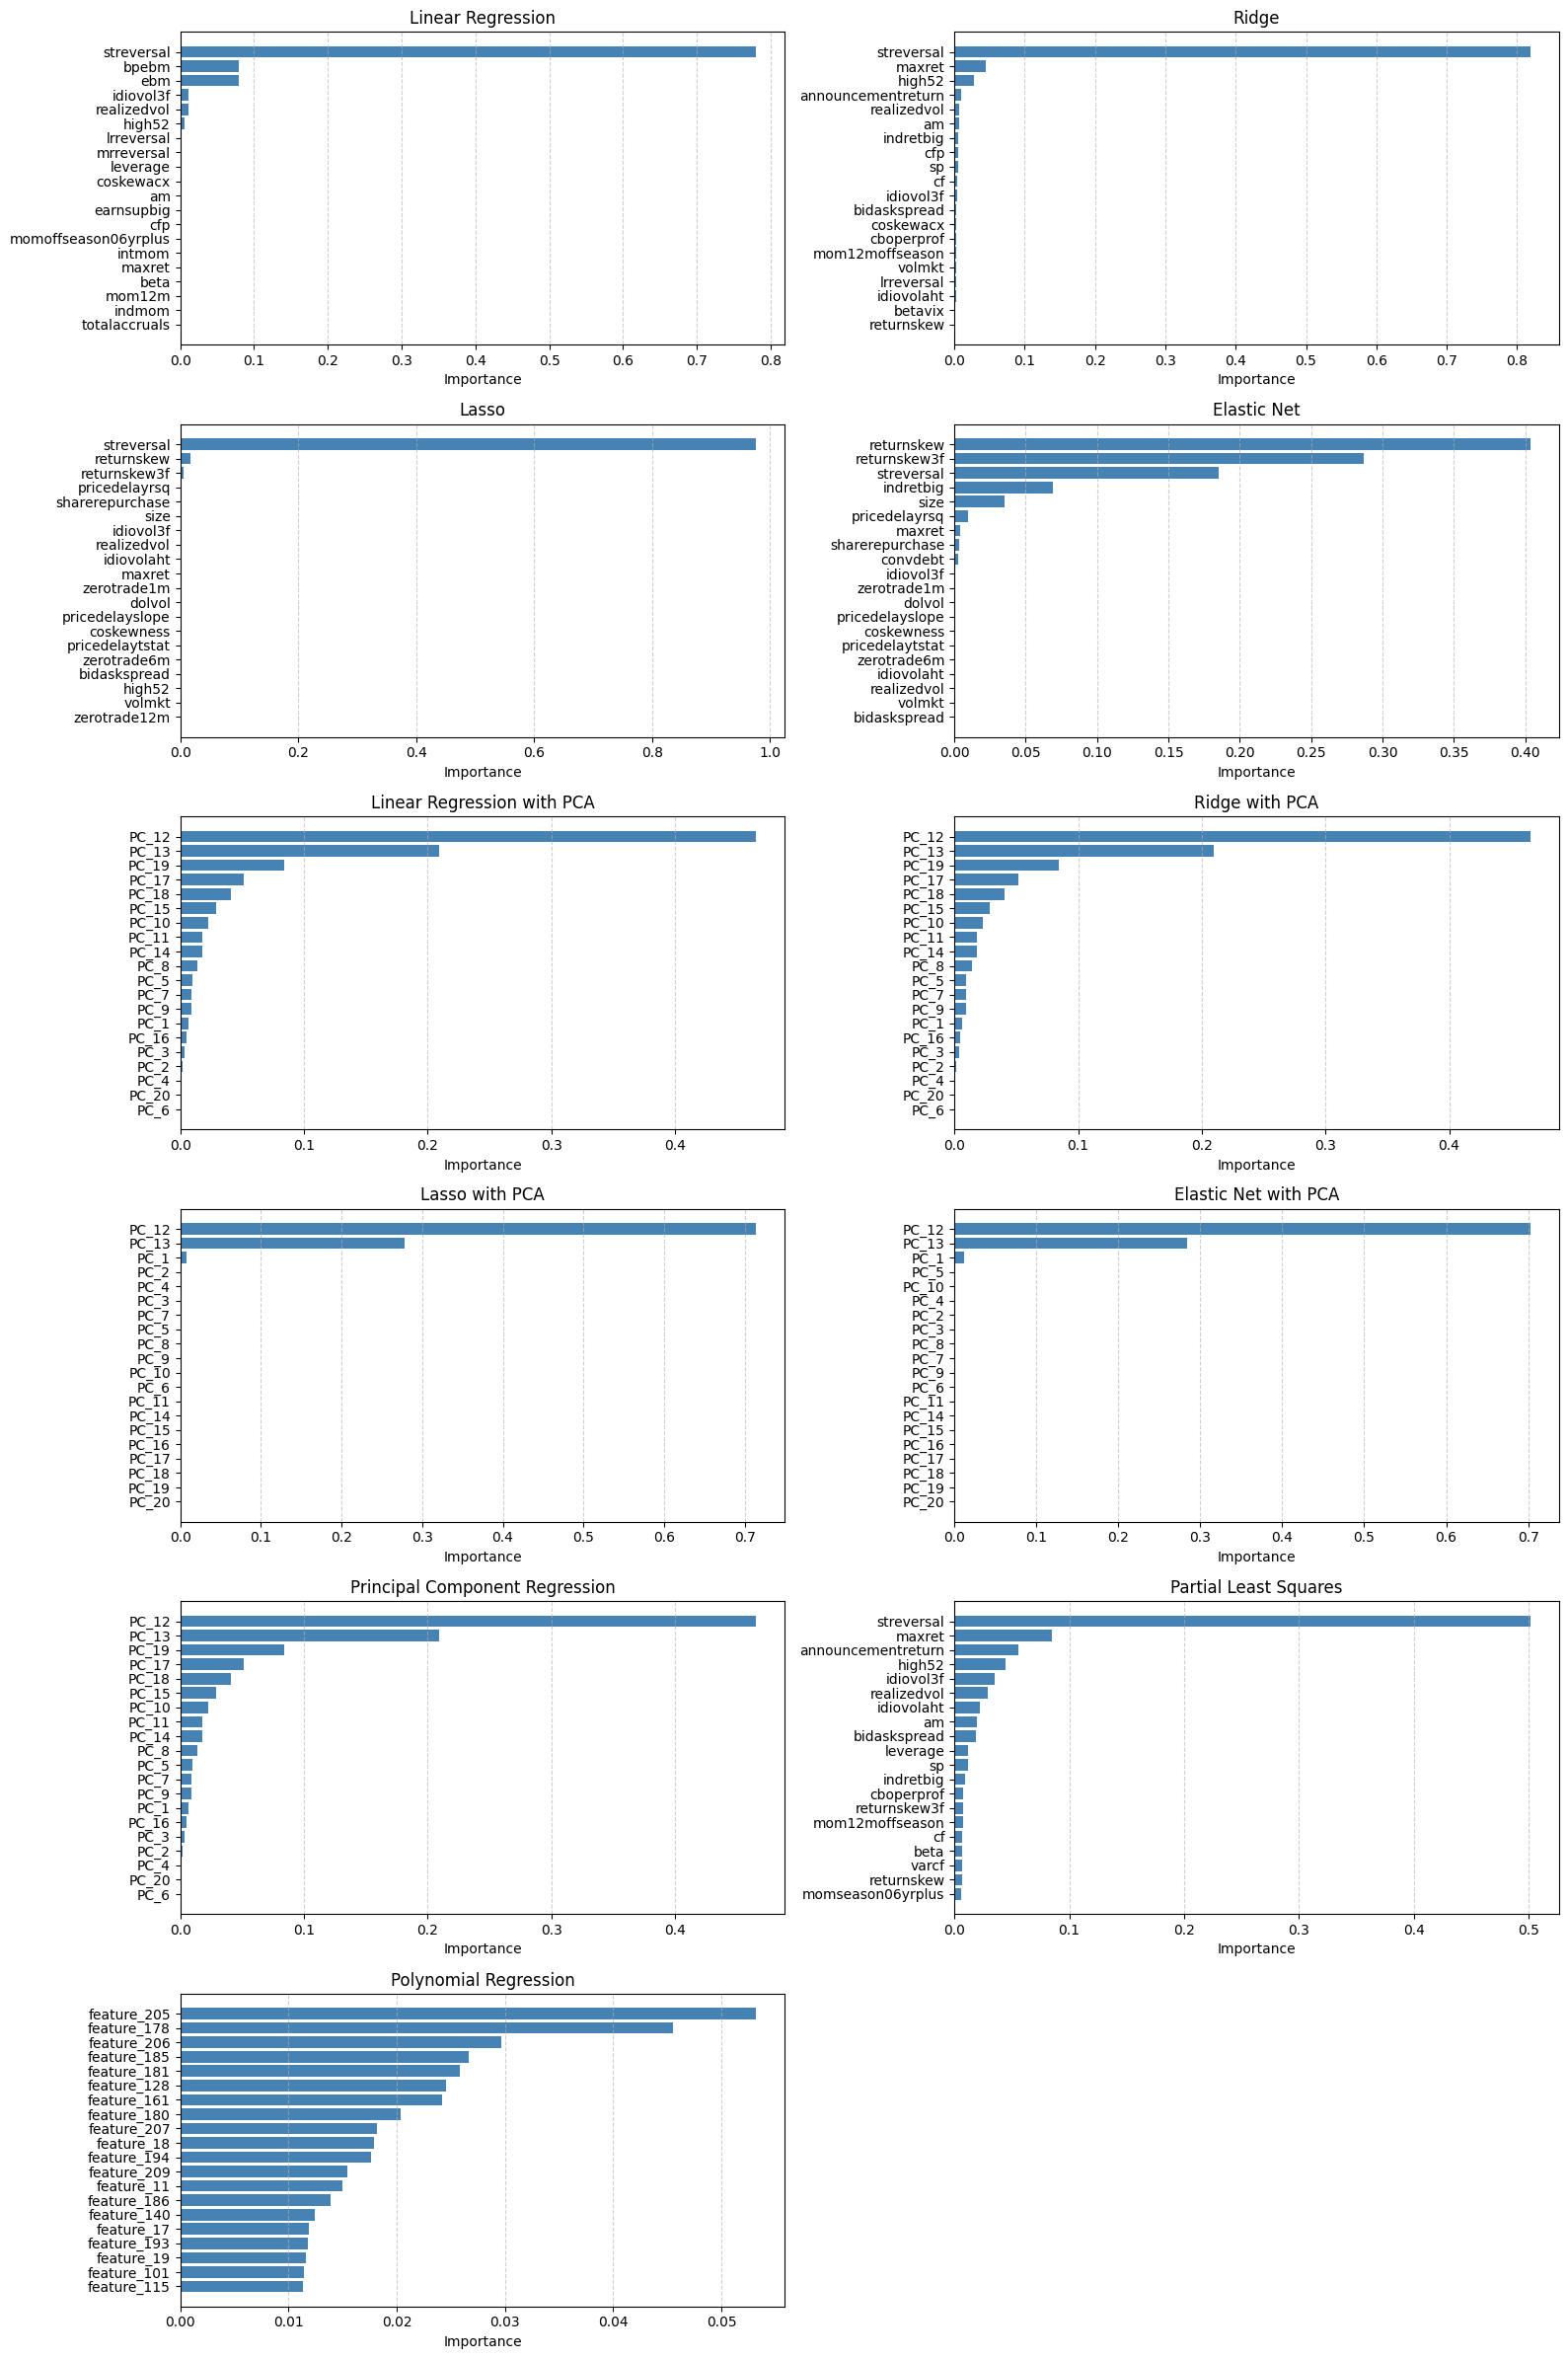

In [53]:
fig = plot_feature_importance(
    model_results=model_results,
    models=models,
    X_train=X_train_scaled[predictor_vars],
    y_train=y_train,
    feature_names=predictor_vars if isinstance(X_train_scaled, pd.DataFrame) else [f'feature_{i}' for i in range(X_train_scaled.shape[1])],
    n_features=20,
    ncols=2,
    figsize=(16, 24)
)

plt.show()

# Tuning

In [54]:
def tune_model_params(model_name, X_train, y_train, X_valid, y_valid, param_grid):
    """
    Tune hyperparameters for a given model using validation data with focus on r2_oos

    Parameters:
    -----------
    model_name : str
        Name of the model to tune
    X_train : array
        Training feature data (already scaled)
    y_train : array
        Training target data
    X_valid : array
        Validation feature data (already scaled)
    y_valid : array
        Validation target data
    param_grid : dict
        Dictionary of parameter grid to search

    Returns:
    --------
    dict
        Best parameters and model
    """
    best_val_r2 = -np.inf  # We want to maximize R² OOS
    best_params = None
    best_model = None

    # Convert param_grid to list of parameter combinations
    grid = list(ParameterGrid(param_grid))

    # Define function to evaluate a parameter set
    def evaluate_params(params):
        # Create model based on name with specific parameters
        try:
            if model_name == 'Linear Regression':
                # Linear regression doesn't have parameters to tune
                model = LinearRegression()

            elif model_name == 'Ridge':
                model = Ridge(alpha=params['alpha'], random_state=42)

            elif model_name == 'Lasso':
                model = Lasso(alpha=params['alpha'], max_iter=10000, random_state=42)

            elif model_name == 'Elastic Net':
                model = ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio'],
                                  max_iter=10000, random_state=42)

            # PCA Pipeline models
            elif model_name == 'Linear Regression with PCA':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('linear', LinearRegression())
                ])

            elif model_name == 'Ridge with PCA':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('ridge', Ridge(alpha=params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Lasso with PCA':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('lasso', Lasso(alpha=params['lasso__alpha'], max_iter=10000, random_state=42))
                ])

            elif model_name == 'Elastic Net with PCA':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('elasticnet', ElasticNet(alpha=params['elasticnet__alpha'],
                                            l1_ratio=params['elasticnet__l1_ratio'],
                                            max_iter=10000, random_state=42))
                ])

            elif model_name == 'Principal Component Regression':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('ridge', Ridge(alpha=params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Partial Least Squares':
                model = PLSRegression(n_components=params['n_components'], scale=False)

            elif model_name == 'Polynomial Regression':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('poly', PolynomialFeatures(degree=params['poly__degree'],
                                               interaction_only=True, include_bias=False)),
                    ('ridge', Ridge(alpha=params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Random Forest':
                model = RandomForestRegressor(
                    n_estimators=params['n_estimators'],
                    max_depth=params['max_depth'],
                    min_samples_leaf=params['min_samples_leaf'],
                    max_features=params['max_features'],
                    bootstrap=True,
                    random_state=42,
                    n_jobs=-1
                )

            elif model_name == 'Gradient Boosting':
                model = GradientBoostingRegressor(
                    n_estimators=params['n_estimators'],
                    max_depth=params['max_depth'],
                    learning_rate=params['learning_rate'],
                    subsample=params['subsample'],
                    min_samples_leaf=params['min_samples_leaf'],
                    random_state=42
                )

            else:
                print(f"Unknown model: {model_name}")
                return -np.inf, params, None

            # Fit the model
            # model.fit(X_train, y_train)

            if isinstance(X_train, pd.DataFrame):
                model.fit(X_train.values, y_train)
                valid_preds = model.predict(X_valid.values)
            else:
                model.fit(X_train, y_train)
                valid_preds = model.predict(X_valid)


            # Make validation predictions
            valid_preds = model.predict(X_valid)

            # Flatten predictions if needed
            if hasattr(valid_preds, 'shape') and len(valid_preds.shape) > 1:
                valid_preds = valid_preds.flatten()

            # Calculate custom R² OOS metric
            r2_value = r2_oos(y_valid, valid_preds)

            return r2_value, params, model

        except Exception as e:
            print(f"Error with {model_name}, params: {params}. Error: {e}")
            return -np.inf, params, None

    # Evaluate all parameter combinations in parallel
    results = Parallel(n_jobs=3)(delayed(evaluate_params)(params) for params in grid)

    # Find the best parameters (highest R² OOS)
    for r2_value, params, model in results:
        if r2_value > best_val_r2:
            best_val_r2 = r2_value
            best_params = params
            best_model = model

    return {
        'best_params': best_params,
        'best_model': best_model,
        'best_val_r2': best_val_r2
    }

In [55]:
# Define parameter grids for each model with adjusted hyperparameters to reduce overfitting
param_grids = {
    'Linear Regression': {},  # No parameters to tune

    'Ridge': {
        'alpha': [0.1, 1.0, 10.0, 50.0, 100.0, 200.0]  # Expanded alpha range
    },

    'Lasso': {
        'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]  # Expanded alpha range
    },

    'Elastic Net': {
        'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Higher alpha values
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },

    'Linear Regression with PCA': {
        'pca__n_components': [5, 10, 15, 20]  # Reduced from N_PC to prevent overfitting
    },

    'Ridge with PCA': {
        'pca__n_components': [5, 10, 15, 20],  # Reduced components
        'ridge__alpha': [1.0, 10.0, 50.0, 100.0]  # Higher regularization
    },

    'Lasso with PCA': {
        'pca__n_components': [5, 10, 15, 20],
        'lasso__alpha': [0.1, 0.5, 1.0, 5.0]
    },

    'Elastic Net with PCA': {
        'pca__n_components': [5, 10, 15, 20],
        'elasticnet__alpha': [0.5, 1.0, 5.0, 10.0],
        'elasticnet__l1_ratio': [0.3, 0.5, 0.7]
    },

    'Principal Component Regression': {
        'pca__n_components': [5, 10, 15, 20],  # Reduced components
        'ridge__alpha': [1.0, 10.0, 50.0, 100.0]
    },

    'Partial Least Squares': {
        'n_components': [2, 5, 8, 10, 15]  # Your current PLS is working well
    },

    'Polynomial Regression': {
        'pca__n_components': [5, 8, 10, 15],  # Reduced components
        'poly__degree': [1, 2],  # Consider lower degree
        'ridge__alpha': [10.0, 50.0, 100.0, 200.0]  # Stronger regularization
    },

    'Random Forest': {
        'n_estimators': [10, 15, 20, 25],
        'max_depth': [2, 3, 5],  # Consider even limiting to max_depth=2
        'min_samples_leaf': [500, 1000, 2000],  # Increased to prevent overfitting
        'max_features': ['sqrt', 'log2', 0.3]  # Add feature subsampling options
    },

    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'max_depth': [1, 2, 3],  # Shallower trees
        'learning_rate': [0.01, 0.05, 0.1],  # Consider even smaller learning rates
        'subsample': [0.5, 0.7, 0.8],  # More aggressive subsampling
        'min_samples_leaf': [500, 1000, 2000]  # Larger leaf size
    }
}

In [56]:
def tune_and_evaluate_all_models(X_train, y_train, X_valid, y_valid, X_test, y_test,
                                capm_pred_test=None):
    """
    Train and evaluate all models with tuned parameters

    Parameters:
    -----------
    X_train, y_train : arrays
        Training data
    X_valid, y_valid : arrays
        Validation data for tuning
    X_test, y_test : arrays
        Test data for final evaluation
    capm_pred_test : array, optional
        CAPM predictions for test set, used for benchmarking

    Returns:
    --------
    dict
        Dictionary with tuned models and performance metrics
    """
    models_dict = {}
    performance = {}

    # Loop through each model
    for model_name in tqdm(param_grids.keys(), desc="Tuning models"):
        print(f"\nTuning {model_name}...")

        # Skip models that are too computationally expensive if needed
        if model_name == 'SVM Regression' and X_train.shape[0] > 10000:
            print(f"Skipping {model_name} due to large dataset size")
            continue

        # Get parameter grid for this model
        param_grid = param_grids[model_name]

        # Tune hyperparameters
        result = tune_model_params(model_name, X_train, y_train, X_valid, y_valid, param_grid)

        best_params = result['best_params']
        best_val_r2 = result.get('best_val_r2', None)

        if best_params is None:
            print(f"Failed to tune {model_name}")
            continue

        # Retrain on combined train+valid data
        X_train_valid = np.vstack([X_train, X_valid])
        y_train_valid = np.concatenate([y_train, y_valid])

        # Create a fresh model with the best parameters instead of reusing the trained one
        try:
            if model_name == 'Linear Regression':
                final_model = LinearRegression()

            elif model_name == 'Ridge':
                final_model = Ridge(alpha=best_params['alpha'], random_state=42)

            elif model_name == 'Lasso':
                final_model = Lasso(alpha=best_params['alpha'], max_iter=10000, random_state=42)

            elif model_name == 'Elastic Net':
                final_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'],
                                        max_iter=10000, random_state=42)

            # PCA Pipeline models
            elif model_name == 'Linear Regression with PCA':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('linear', LinearRegression())
                ])

            elif model_name == 'Ridge with PCA':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('ridge', Ridge(alpha=best_params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Lasso with PCA':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('lasso', Lasso(alpha=best_params['lasso__alpha'], max_iter=10000, random_state=42))
                ])

            elif model_name == 'Elastic Net with PCA':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('elasticnet', ElasticNet(alpha=best_params['elasticnet__alpha'],
                                            l1_ratio=best_params['elasticnet__l1_ratio'],
                                            max_iter=10000, random_state=42))
                ])

            elif model_name == 'Principal Component Regression':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('ridge', Ridge(alpha=best_params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Partial Least Squares':
                final_model = PLSRegression(n_components=best_params['n_components'], scale=False)

            elif model_name == 'Polynomial Regression':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('poly', PolynomialFeatures(degree=best_params['poly__degree'],
                                               interaction_only=True, include_bias=False)),
                    ('ridge', Ridge(alpha=best_params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Random Forest':
                final_model = RandomForestRegressor(
                    n_estimators=best_params['n_estimators'],
                    max_depth=best_params['max_depth'],
                    min_samples_leaf=best_params['min_samples_leaf'],
                    max_features=best_params['max_features'],
                    bootstrap=True,
                    random_state=42,
                    n_jobs=-1
                )

            elif model_name == 'Gradient Boosting':
                final_model = GradientBoostingRegressor(
                    n_estimators=best_params['n_estimators'],
                    max_depth=best_params['max_depth'],
                    learning_rate=best_params['learning_rate'],
                    subsample=best_params['subsample'],
                    min_samples_leaf=best_params['min_samples_leaf'],
                    random_state=42
                )

            else:
                print(f"Unknown model: {model_name}")
                continue

            # Fit the freshly created model on combined data
            if isinstance(X_train_valid, pd.DataFrame):
                final_model.fit(X_train_valid.values, y_train_valid)
            else:
                final_model.fit(X_train_valid, y_train_valid)

        except Exception as e:
            print(f"Error creating model with best parameters: {e}")
            continue

        # Make predictions for all datasets
        if isinstance(X_train, pd.DataFrame):
            train_preds = final_model.predict(X_train.values)
            valid_preds = final_model.predict(X_valid.values)
            test_preds = final_model.predict(X_test.values)
        else:
            train_preds = final_model.predict(X_train)
            valid_preds = final_model.predict(X_valid)
            test_preds = final_model.predict(X_test)

        # Flatten predictions if needed
        if hasattr(test_preds, 'shape') and len(test_preds.shape) > 1:
            train_preds = train_preds.flatten()
            valid_preds = valid_preds.flatten()
            test_preds = test_preds.flatten()

        # Calculate R² OOS for all splits
        train_r2_oos = r2_oos(y_train, train_preds)
        valid_r2_oos = r2_oos(y_valid, valid_preds)
        test_r2_oos = r2_oos(y_test, test_preds)

        # Calculate MSE
        test_mse = mean_squared_error(y_test, test_preds)

        # Calculate R² against CAPM if provided
        r2_vs_capm = None
        if capm_pred_test is not None:
            capm_mse = mean_squared_error(y_test, capm_pred_test)
            r2_vs_capm = 1 - (test_mse / capm_mse)

        # Store results
        models_dict[model_name] = final_model
        performance[model_name] = {
            'best_params': best_params,
            'train_r2_oos': train_r2_oos,
            'valid_r2_oos': valid_r2_oos,
            'test_r2_oos': test_r2_oos,
            'best_val_r2': best_val_r2,
            'test_mse': test_mse,
            'r2_vs_capm': r2_vs_capm,
            'train_pred': train_preds,
            'valid_pred': valid_preds,
            'test_pred': test_preds
        }

        print(f"{model_name} Results:")
        print(f"  Train R² OOS: {train_r2_oos:.4f}")
        print(f"  Valid R² OOS: {valid_r2_oos:.4f}")
        print(f"  Test R² OOS: {test_r2_oos:.4f}")
        if r2_vs_capm is not None:
            print(f"  R² vs CAPM: {r2_vs_capm:.4f}")
        print(f"  Best parameters: {best_params}")

    return {
        'models': models_dict,
        'performance': performance
    }

In [57]:
# Extract only the CAPM prediction column
capm_predictions = merged_df_capm.loc[test_indices, 'CAPM_Predicted_ExcessReturn'].values


In [58]:
results = tune_and_evaluate_all_models(
    X_train_scaled, y_train,
    X_valid_scaled, y_valid,
    X_test_scaled, y_test,
    capm_pred_test=capm_predictions
)

Tuning models:   0%|          | 0/13 [00:00<?, ?it/s]


Tuning Linear Regression...


/Users/arshad/Documents/prog/python/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
Tuning models:   0%|          | 0/13 [00:12<?, ?it/s]


ValueError: Input contains NaN.

In [ ]:
tuned_model_results = results['performance']
tuned_model_results

{'Linear Regression': {'best_params': {},
  'train_r2_oos': np.float64(0.958136085592045),
  'valid_r2_oos': np.float64(0.9759784327596296),
  'test_r2_oos': np.float64(0.8534561048200199),
  'best_val_r2': np.float64(0.838777108447017),
  'test_mse': 23.912847666738593,
  'r2_vs_capm': 0.8283990922505781,
  'train_pred': array([ -7.49958237,  -6.11585575,  -3.43844281, ...,  -3.63824985,
         -20.77145684, -12.28437782]),
  'valid_pred': array([ -5.8510326 ,   0.46902758, -14.24818282, ...,  -4.59701542,
          -7.40100299,  -3.58037091]),
  'test_pred': array([ -6.35523162, -19.99002065,  -2.63898998, ..., -10.39458773,
           6.98795693,  -0.37202904])},
 'Ridge': {'best_params': {'alpha': 10.0},
  'train_r2_oos': np.float64(0.9578522764731797),
  'valid_r2_oos': np.float64(0.9761810457913686),
  'test_r2_oos': np.float64(0.8543228301364986),
  'best_val_r2': np.float64(0.8395184584768525),
  'test_mse': 23.77141652464697,
  'r2_vs_capm': 0.8294140158056977,
  'train_pred

In [ ]:
list(merged_df_capm.columns)

['permno',
 'date',
 'prc',
 'ret',
 'price',
 'size',
 'streversal',
 'maxret',
 'high52',
 'realizedvol',
 'idiovol3f',
 'returnskew3f',
 'returnskew',
 'idiovolaht',
 'zerotrade1m',
 'dolvol',
 'pricedelayrsq',
 'pricedelayslope',
 'coskewness',
 'pricedelaytstat',
 'zerotrade6m',
 'bidaskspread',
 'volmkt',
 'zerotrade12m',
 'beta',
 'illiquidity',
 'coskewacx',
 'divinit',
 'divomit',
 'exchswitch',
 'indipo',
 'spinoff',
 'firmage',
 'indmom',
 'mom6m',
 'volsd',
 'mom12moffseason',
 'betafp',
 'momseasonshort',
 'mom12m',
 'intmom',
 'volumetrend',
 'convdebt',
 'rdipo',
 'sharerepurchase',
 'opleverage',
 'bookleverage',
 'roe',
 'mrreversal',
 'shareiss1y',
 'hire',
 'betavix',
 'residualmomentum',
 'momseason',
 'momoffseason',
 'betaliquidityps',
 'chinv',
 'delcoa',
 'dellti',
 'assetgrowth',
 'accruals',
 'delcol',
 'chnwc',
 'delfinl',
 'delnetfin',
 'chnncoa',
 'grltnoa',
 'tax',
 'noa',
 'delequ',
 'dnoa',
 'herf',
 'pctacc',
 'totalaccruals',
 'equityduration',
 'lrrev

In [ ]:
tuned_model_results = results['performance']

print("\nModel Comparison (Test R² OOS):")
print(f'CAPM: {r_squared_capm:.3f}')
for name, results in tuned_model_results.items():
    print(f"{name}:\n test:{results['test_r2_oos']:.3f} train:{results['train_r2_oos']:.3f} val:{results['valid_r2_oos']:.3f}")


Model Comparison (Test R² OOS):
CAPM: 0.146
Linear Regression:
 test:0.853 train:0.958 val:0.976
Ridge:
 test:0.854 train:0.958 val:0.976
Lasso:
 test:0.806 train:0.929 val:0.963
Elastic Net:
 test:0.346 train:0.572 val:0.542
Linear Regression with PCA:
 test:-0.025 train:0.294 val:0.227
Ridge with PCA:
 test:-0.025 train:0.294 val:0.227
Lasso with PCA:
 test:-0.021 train:0.289 val:0.222
Elastic Net with PCA:
 test:-0.091 train:0.190 val:0.119
Principal Component Regression:
 test:-0.025 train:0.294 val:0.227
Partial Least Squares:
 test:0.852 train:0.952 val:0.970
Polynomial Regression:
 test:0.017 train:0.316 val:0.243
Random Forest:
 test:0.633 train:0.850 val:0.820


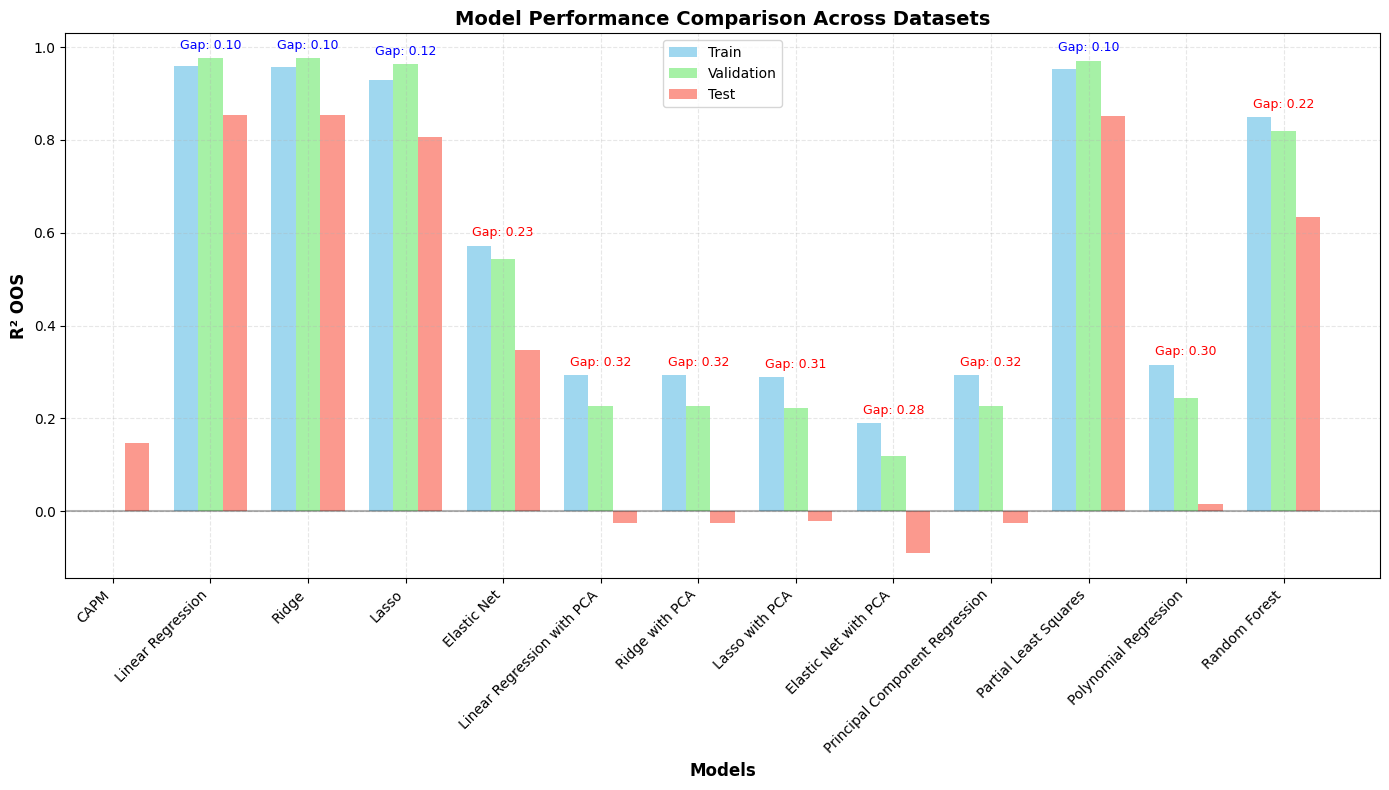

In [ ]:
fig_t = plot_overfitting_assessment(tuned_model_results, r_squared_capm)
plt.show()

/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_61275/811107011.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/arshad/Documents/prog/python/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


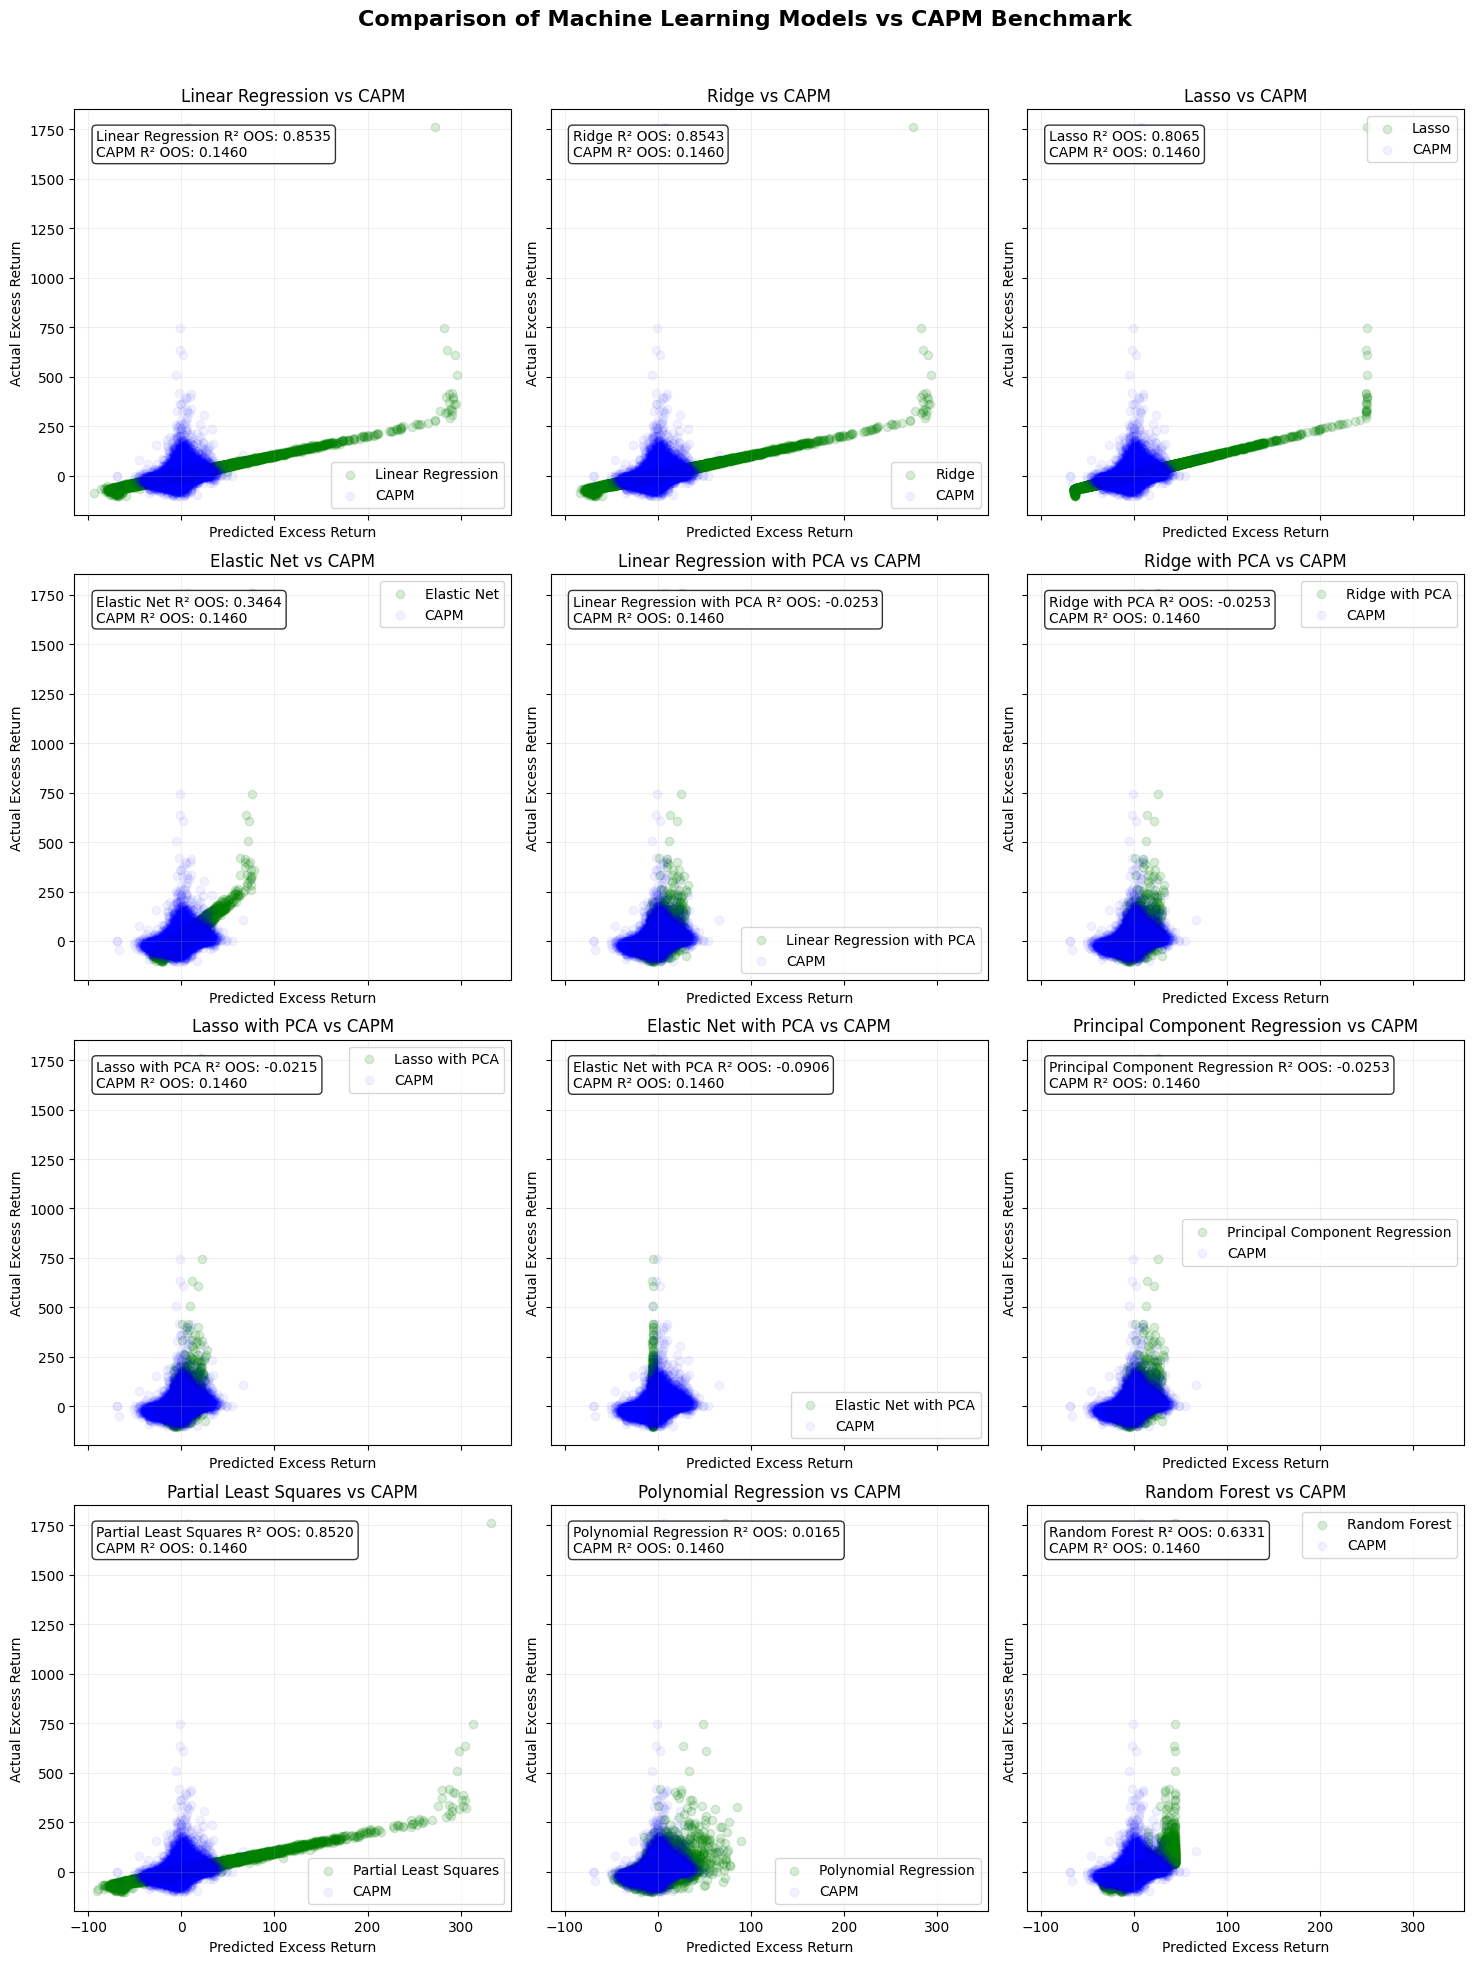

In [ ]:
plot_model_comparison(tuned_model_results, merged_df_capm, test_indices, y_test)

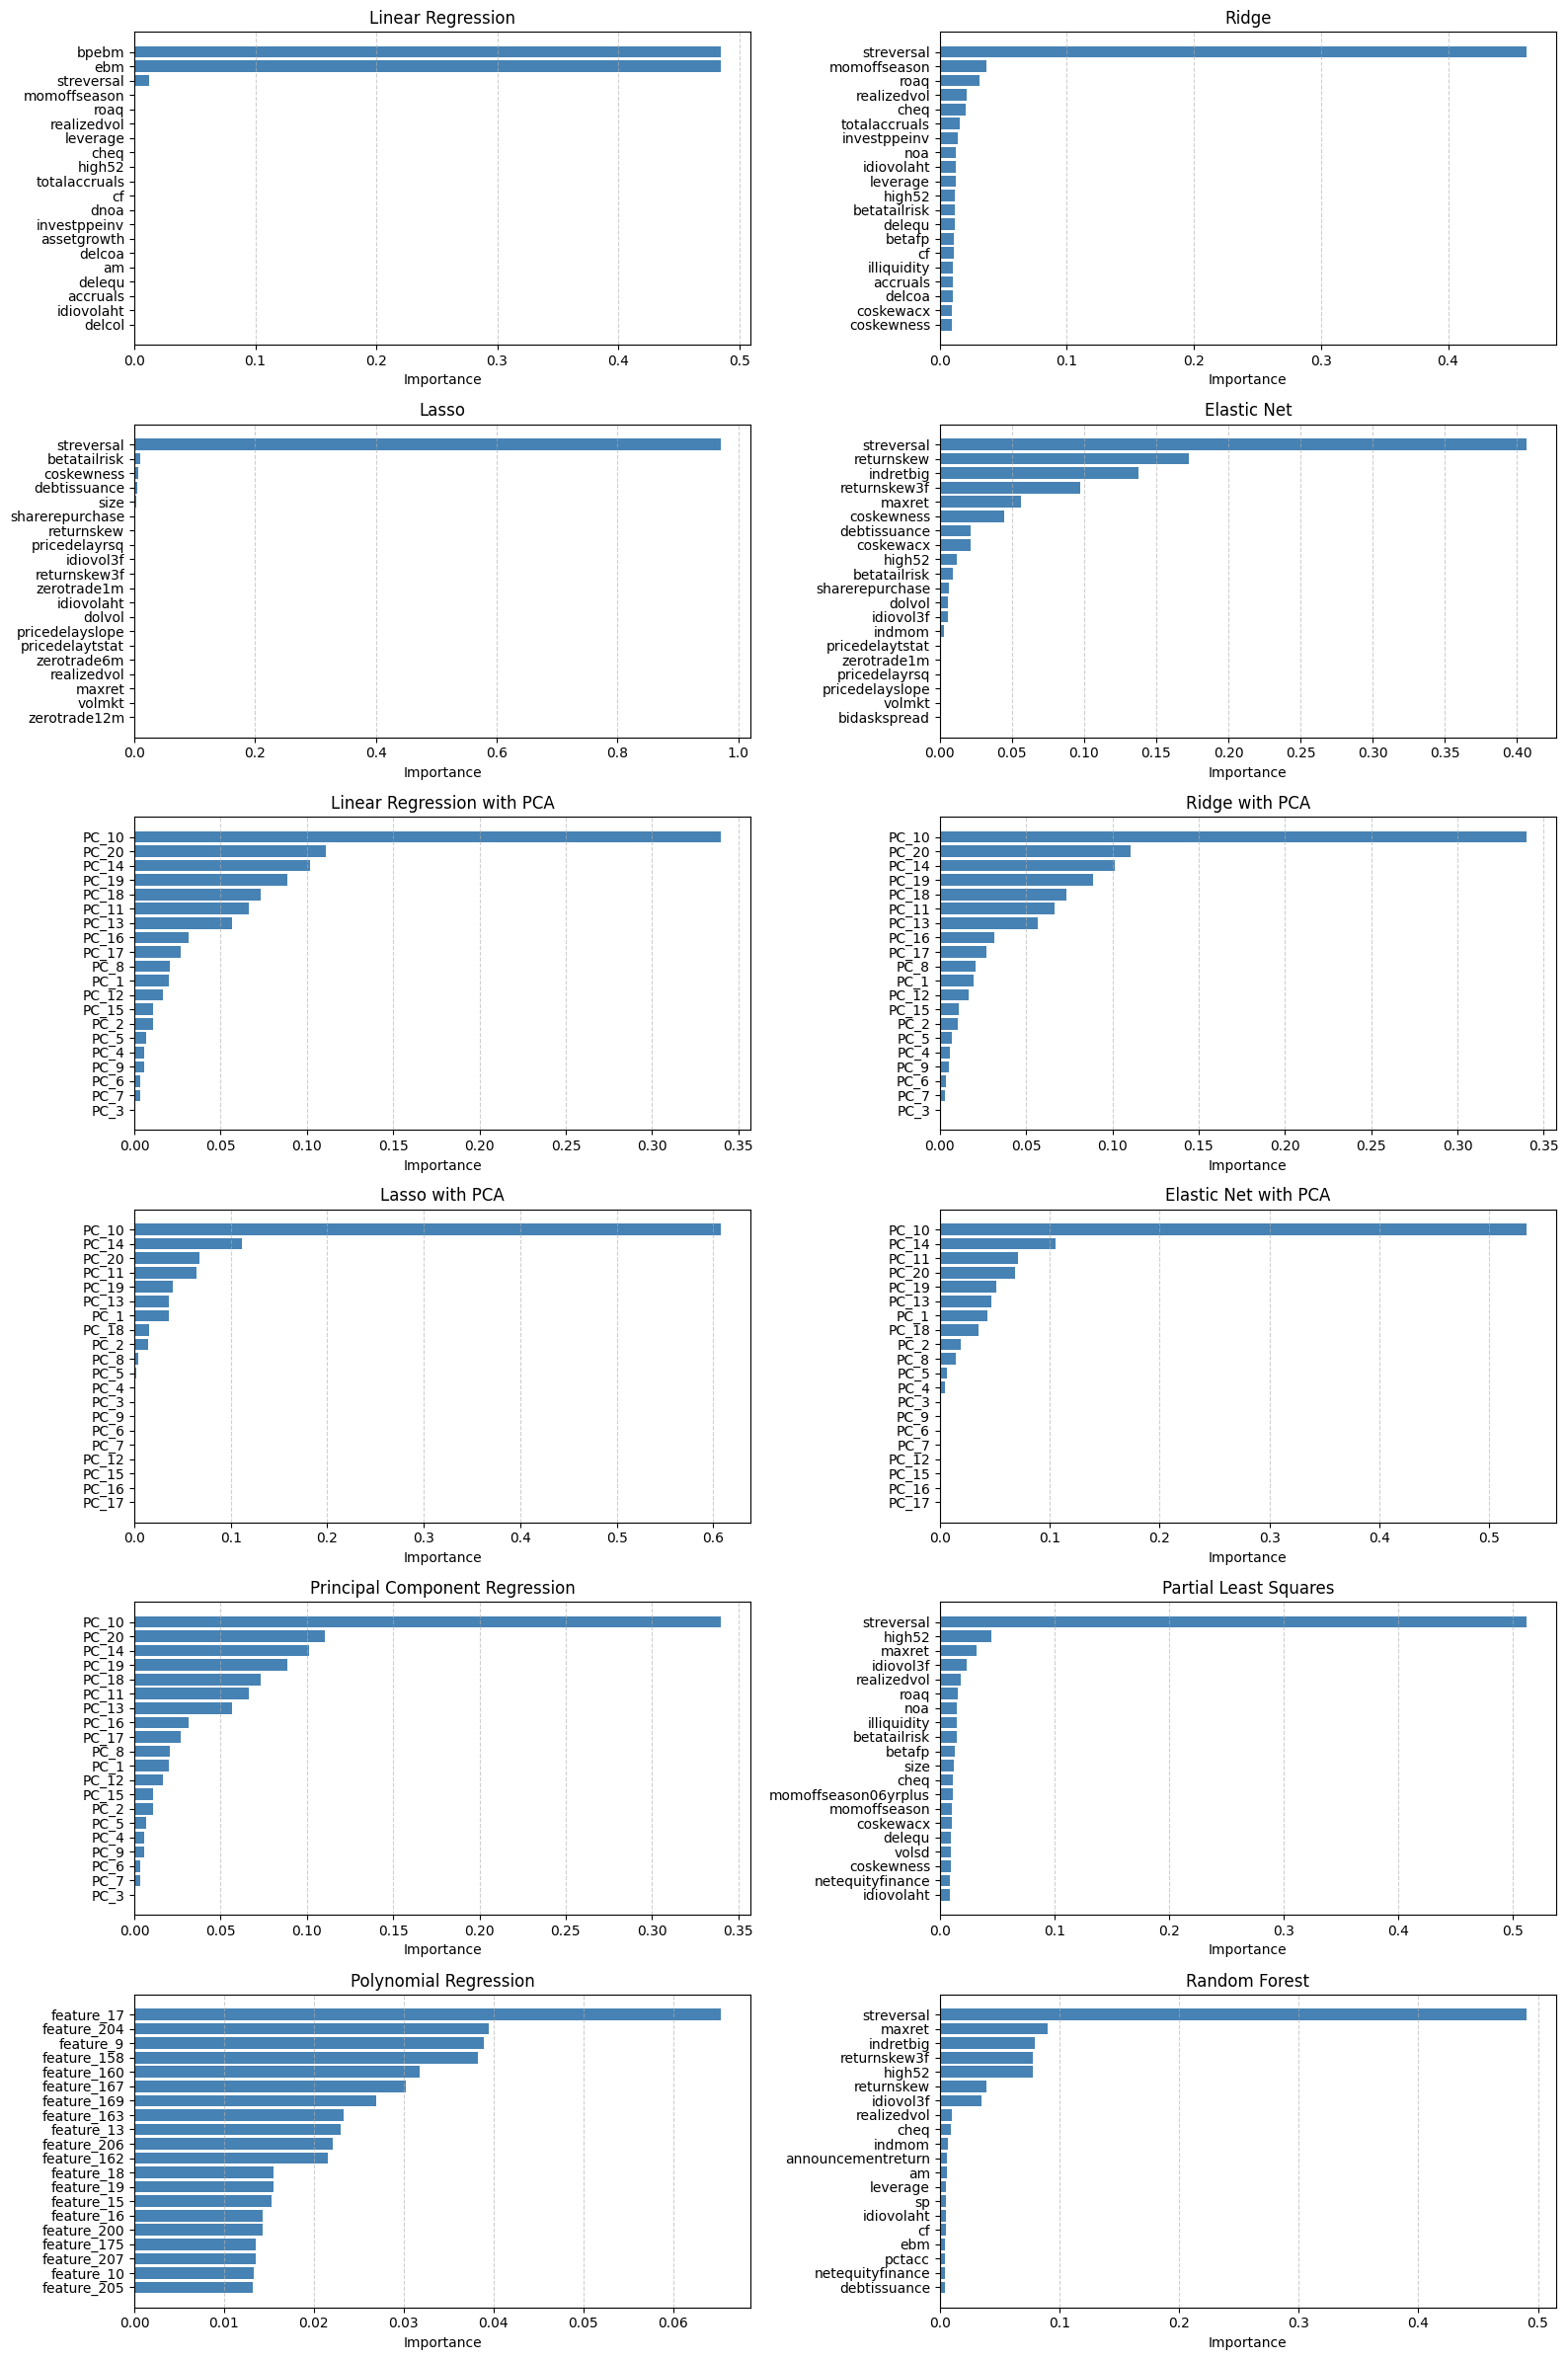

In [ ]:
fig_t2 = plot_feature_importance(
    model_results=tuned_model_results,
    models=models,
    X_train=X_train_scaled[predictor_vars],
    y_train=y_train,
    feature_names=predictor_vars if isinstance(X_train_scaled, pd.DataFrame) else [f'feature_{i}' for i in range(X_train_scaled.shape[1])],
    n_features=20,
    ncols=2,
    figsize=(16, 24)
)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import datetime

#---------------------------------------------------------------------------------
# 1. R² COMPARISON PLOT
#---------------------------------------------------------------------------------

def create_r2_comparison_plot(tuned_model_results, r_squared_capm):
    """
    Creates a bar plot comparing the out-of-sample R² of different machine learning models.
    """
    # Extract model names and R² values
    model_names = ['CAPM'] + list(tuned_model_results.keys())

    # Extract test R² values
    test_r2 = [r_squared_capm]
    for model_name in tuned_model_results.keys():
        test_r2.append(tuned_model_results[model_name]['test_r2_oos'])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'Model': model_names,
        'R² OOS': test_r2
    })

    # Set up the figure
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create bar plot with a color palette
    bars = ax.bar(plot_df['Model'], plot_df['R² OOS'],
                 color=sns.color_palette("tab10", len(plot_df)))

    # Add value labels on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height < 0:
            va = 'top'
            offset = -0.01
        else:
            va = 'bottom'
            offset = 0.01

        ax.text(bar.get_x() + bar.get_width()/2., height + offset,
                f'{test_r2[i]:.3f}',
                ha='center', va=va, fontsize=9)

    # Add horizontal line at 0
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # Set labels and title
    ax.set_ylabel('Out-of-Sample R²')
    ax.set_title('Comparison of Machine Learning Models (Test R² OOS)')

    # Add grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Tight layout
    plt.tight_layout()

    return fig, ax

#---------------------------------------------------------------------------------
# 2. VARIABLE IMPORTANCE PLOT
#---------------------------------------------------------------------------------

def create_variable_importance_plot(model_name, data, top_n=20):
    """
    Creates a horizontal bar plot showing the importance of the top N variables for a specific model.

    This function works with your existing feature importance data and assumes you have
    variable importance scores for each model in a dictionary or DataFrame.
    """
    # Set up the figure
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 10))

    # Sort and get top N variables
    # Assuming 'data' is either a Series or a dictionary of feature importances
    if isinstance(data, dict):
        importance = pd.Series(data).sort_values(ascending=False).head(top_n)
    else:
        importance = data.sort_values(ascending=False).head(top_n)

    # Create horizontal bar plot
    colors = sns.color_palette("Blues_r", len(importance))
    bars = ax.barh(importance.index[::-1], importance.values[::-1], color=colors)

    # Add value labels to the right of each bar
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', va='center', fontsize=9)

    # Set labels and title
    ax.set_xlabel('Importance')
    ax.set_title(f'Top {top_n} Variable Importance for {model_name}')

    # Add grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Tight layout
    plt.tight_layout()

    return fig, ax


In [ ]:
def create_cumulative_returns_plot(merged_df_capm, tuned_model_results,
                                  excess_return_col='ExcessReturn'):
    """
    Creates a plot of cumulative log returns for portfolios constructed from model predictions.

    Parameters:
    -----------
    merged_df_capm : pandas.DataFrame
        DataFrame containing stock returns and features
    tuned_model_results : dict
        Dictionary with model results including predictions
    excess_return_col : str, default='ExcessReturn'
        Column name for excess returns

    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    import seaborn as sns
    from matplotlib.lines import Line2D

    # Create a copy of the dataframe
    df = merged_df_capm.copy()

    # Convert date to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

    # Set up the figure
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))

    # Define recession periods (as in the original paper)
    recessions = [
        ('1990-07-01', '1991-03-31'),
        ('2001-03-01', '2001-11-30'),
        ('2007-12-01', '2009-06-30')
    ]

    # Add recession shading
    for start, end in recessions:
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        ax.axvspan(start_date, end_date, color='gray', alpha=0.3)

    # Initialize color palette
    models = list(tuned_model_results.keys())
    colors = sns.color_palette("tab10", len(models) + 1)  # +1 for CAPM

    # Plot market excess return (CAPM)
    # First, calculate monthly average market excess return
    monthly_market = df.groupby(df['date'].dt.to_period('M'))['MarketExcessReturn'].mean()
    monthly_market.index = monthly_market.index.to_timestamp()

    # Calculate cumulative market returns
    cum_market_returns = (1 + monthly_market/100).cumprod() - 1
    ax.plot(monthly_market.index, cum_market_returns, color='black', linewidth=1.5, label='SP500-Rf')

    # Store prediction columns for tracking
    model_pred_columns = []

    # Add model predictions
    for i, model_name in enumerate(models):
        # Get model predictions from tuned_model_results
        model_preds = tuned_model_results[model_name]['test_pred']

        # Get the last part of the test dataset (corresponding to test_pred)
        n_test = len(model_preds)

        # Sort the dataframe by date
        df_sorted = df.sort_values('date')

        # Create dataframe with only the test period data
        test_period_df = df_sorted.tail(n_test).copy().reset_index(drop=True)

        # Add predictions directly to this temporary dataframe
        model_pred_column = f'{model_name}_pred'
        test_period_df[model_pred_column] = model_preds
        model_pred_columns.append(model_pred_column)

        # Create a unique identifier for precise matching
        df['temp_id'] = df['permno'].astype(str) + '_' + df['date'].dt.strftime('%Y-%m-%d')
        test_period_df['temp_id'] = test_period_df['permno'].astype(str) + '_' + test_period_df['date'].dt.strftime('%Y-%m-%d')

        # Only keep predictions and identifier for merging
        predictions_df = test_period_df[['temp_id', model_pred_column]]

        # Left join the predictions to the original dataframe
        df = df.merge(predictions_df, on='temp_id', how='left')

        # Calculate deciles for each month based on the predictions
        # Only use rows with predictions (non-NaN)
        model_df = df.dropna(subset=[model_pred_column])

        # Compute deciles for each month
        model_df[f'{model_name}_decile'] = model_df.groupby(model_df['date'].dt.to_period('M'))[model_pred_column].transform(
            lambda x: pd.qcut(x, 10, labels=False, duplicates='drop')
        )

        # Get average excess return for each month/decile combination
        monthly_data = model_df.groupby([model_df['date'].dt.to_period('M'), f'{model_name}_decile'])[excess_return_col].mean().reset_index()
        monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

        # Get top decile (9) and bottom decile (0)
        top_decile = monthly_data[monthly_data[f'{model_name}_decile'] == 9].set_index('date')
        bottom_decile = monthly_data[monthly_data[f'{model_name}_decile'] == 0].set_index('date')

        # Calculate cumulative returns
        cum_top_returns = (1 + top_decile[excess_return_col]/100).cumprod() - 1
        cum_bottom_returns = (1 + bottom_decile[excess_return_col]/100).cumprod() - 1

        # Plot long position (top decile)
        ax.plot(cum_top_returns.index, cum_top_returns, color=colors[i], linewidth=1.5, label=model_name)

        # Plot short position (bottom decile) with dashed line
        ax.plot(cum_bottom_returns.index, cum_bottom_returns, color=colors[i], linewidth=1.5, linestyle='--')

        # Clean up by removing the temporary columns
        df.drop('temp_id', axis=1, inplace=True)

    # Create a custom legend with model names
    legend_elements = [Line2D([0], [0], color='black', lw=1.5, label='SP500-Rf')]
    for i, model_name in enumerate(models):
        legend_elements.append(Line2D([0], [0], color=colors[i], lw=1.5, label=model_name))

    # Add solid/dashed line style legend elements
    legend_elements.append(Line2D([0], [0], color='black', lw=1.5, label='solid = long'))
    legend_elements.append(Line2D([0], [0], color='black', lw=1.5, linestyle='--', label='dash = short'))

    # Create two separate legends
    leg1 = ax.legend(handles=legend_elements[:-2], loc='upper left', fontsize=9)
    ax.add_artist(leg1)

    # Create another legend for line styles
    ax.legend(handles=legend_elements[-2:], loc='upper right', fontsize=9)

    # Set labels
    ax.set_ylabel('Long Position')
    ax.set_xlabel('')
    ax.set_title('Cumulative Returns of Machine Learning Portfolios', fontsize=12)

    # Create a secondary y-axis for short positions
    ax2 = ax.twinx()
    ax2.set_ylabel('Short Position')

    # Format x-axis ticks to show years
    ax.xaxis.set_major_locator(mdates.YearLocator(base=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.YearLocator())

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)

    # Tight layout
    plt.tight_layout()

    return fig, ax

In [ ]:
# # 1. R² Comparison Plot
# fig1, ax1 = create_r2_comparison_plot(tuned_model_results, r_squared_capm)
# plt.savefig('r2_comparison.png', dpi=300, bbox_inches='tight')
# plt.show()

# # # 2. Variable Importance Plot
# # # You'll need to first extract feature importance from your models
# # # For example, if you have importance scores for Random Forest:
# # feature_importance = rf_model.feature_importances_  # Replace with your actual data
# # fig2, ax2 = create_variable_importance_plot("Random Forest", feature_importance)
# # plt.savefig('rf_importance.png', dpi=300, bbox_inches='tight')
# # plt.show()

# # 3. Cumulative Returns Plot
# fig3, ax3 = create_cumulative_returns_plot(merged_df_capm, tuned_model_results, test_indices)
# # plt.savefig('cumulative_returns.png', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# def build_nn_model(input_dim):
#     """Build a neural network model for regression."""
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=(input_dim,)),
#         BatchNormalization(),
#         Dropout(0.2),

#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.2),

#         Dense(32, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.2),

#         Dense(1, activation='linear')  # Linear activation for regression
#     ])

#     # Compile model
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
#     return model

# def train_nn_model(X_train, y_train, X_valid, y_valid, epochs=100, batch_size=32):
#     """Train the neural network model with early stopping."""
#     model = build_nn_model(X_train.shape[1])

#     # Callbacks to prevent overfitting
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

#     history = model.fit(
#         X_train, y_train,
#         validation_data=(X_valid, y_valid),
#         epochs=epochs,
#         batch_size=batch_size,
#         callbacks=[early_stopping, reduce_lr],
#         verbose=1
#     )

#     return model, history

# def evaluate_nn_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test, capm_pred_test=None):
#     """Evaluate the trained neural network model."""
#     train_preds = model.predict(X_train).flatten()
#     valid_preds = model.predict(X_valid).flatten()
#     test_preds = model.predict(X_test).flatten()

#     # Compute R² OOS
#     train_r2_oos = r2_oos(y_train, train_preds)
#     valid_r2_oos = r2_oos(y_valid, valid_preds)
#     test_r2_oos = r2_oos(y_test, test_preds)

#     # Compute MSE
#     test_mse = mean_squared_error(y_test, test_preds)

#     # Compare with CAPM model
#     r2_vs_capm = None
#     if capm_pred_test is not None:
#         capm_mse = mean_squared_error(y_test, capm_pred_test)
#         r2_vs_capm = 1 - (test_mse / capm_mse)

#     print(f"Neural Network Results:")
#     print(f"  Train R² OOS: {train_r2_oos:.4f}")
#     print(f"  Valid R² OOS: {valid_r2_oos:.4f}")
#     print(f"  Test R² OOS: {test_r2_oos:.4f}")
#     if r2_vs_capm is not None:
#         print(f"  R² vs CAPM: {r2_vs_capm:.4f}")

#     return {
#         'train_r2_oos': train_r2_oos,
#         'valid_r2_oos': valid_r2_oos,
#         'test_r2_oos': test_r2_oos,
#         'test_mse': test_mse,
#         'r2_vs_capm': r2_vs_capm,
#         'train_pred': train_preds,
#         'valid_pred': valid_preds,
#         'test_pred': test_preds
#     }


In [ ]:
# # Train the NN model
# nn_model, nn_history = train_nn_model(X_train_scaled, y_train, X_valid_scaled, y_valid)

# # Evaluate the model
# nn_results = evaluate_nn_model(nn_model, X_train_scaled, y_train,
#                                X_valid_scaled, y_valid,
#                                X_test_scaled, y_test,
#                                capm_pred_test=capm_predictions)
